<a href="https://colab.research.google.com/github/georgesteve/Ionospherictools-/blob/main/TEC_Gr%C3%A1fico_Poster_CEDAR_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importando librerías

In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

##Importando data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
tag='S4-huancayo-ALL-2019-2021'
#tag='S4-jicamarca-ALL-2021'
#Data = pd.read_csv('/content/gdrive/My Drive/2019-2021.csv',index_col=False)
#Data = pd.read_csv('/content/gdrive/My Drive/Compendio/'+tag+'.csv',index_col=False)
Data = pd.read_csv('/content/gdrive/My Drive/Data-completa/S4 2015-2017.csv',index_col=False)
Data2 = pd.read_csv('/content/gdrive/My Drive/Data-completa/S4 2018-2021.csv',index_col=False)
s4=Data.drop(columns=['Unnamed: 0'])
s42=Data2.drop(columns=['Unnamed: 0'])
s4 = s4.append(s42, ignore_index=True)

In [ ]:
cd /content/gdrive/My Drive/Data-completa/Graficos-Poster

/content/gdrive/My Drive/Data-completa/Graficos-Poster


In [ ]:
ls

In [ ]:
Data = pd.read_csv('/content/gdrive/My Drive/Data-completa/TEC-jic-2020.csv',index_col=False)
#Data = pd.read_csv('/content/gdrive/My Drive/Data-completa/TEC-tac-2019-2022(may).csv',index_col=False)

s4=Data.drop(columns=['Unnamed: 0'])


In [ ]:
s4

,Hora,Minuto,Segundo,TEC,b,Elv,PRN,Año,Mes,Día
0,8,41,10,2.343,2.830,9.960,1,2019,7,2
1,8,41,20,2.348,2.833,9.976,1,2019,7,2
2,8,41,30,2.357,2.837,9.991,1,2019,7,2
3,8,41,40,2.358,2.840,10.007,1,2019,7,2
4,8,41,50,2.355,2.844,10.023,1,2019,7,2
...,...,...,...,...,...,...,...,...,...,...
17262408,23,59,10,14.454,19.093,40.168,32,2019,11,13
17262409,23,59,20,14.447,19.096,40.168,32,2019,11,13
17262410,23,59,30,14.415,19.099,40.169,32,2019,11,13
17262411,23,59,40,14.417,19.101,40.169,32,2019,11,13


In [ ]:
del Data, Data2, s42

In [ ]:
#s4=s4.dropna()

In [ ]:
#s4['S4-Correction']=s4['S4-Correction'].astype(float)
s4['TEC']=s4['TEC'].astype(float)

In [ ]:
column_names=[ 'YEAR','DOY','Hour','B','Bx','By','Bz','SW Proton Density','Kp index','R','Dst-index','f10.7_index','AE']
SW = pd.read_csv('/content/gdrive/My Drive/Data-completa/omni2_sjyVjCUEsu.lst.txt',delim_whitespace=True,names=column_names)
SW['date_time'] = pd.to_datetime(SW['YEAR']*100000+SW['DOY']*100+SW['Hour'], format='%Y%j%H')-pd.Timedelta(hours=5)
SW.set_index('date_time', inplace=True)
SW.head(20)


,YEAR,DOY,Hour,B,Bx,By,Bz,SW Proton Density,Kp index,R,Dst-index,f10.7_index,AE
date_time,,,,,,,,,,,,,
2014-12-31 19:00:00,2015,1,0,6.1,5.1,-2.9,1.1,2.8,23,104,-14,132.9,42
2014-12-31 20:00:00,2015,1,1,4.8,4.4,-1.5,0.3,2.8,23,104,-13,132.9,43
2014-12-31 21:00:00,2015,1,2,4.3,3.5,-2.2,-0.7,2.5,23,104,-15,132.9,105
2014-12-31 22:00:00,2015,1,3,4.0,3.0,-2.3,0.5,2.7,10,104,-13,132.9,76
2014-12-31 23:00:00,2015,1,4,2.5,-0.3,-0.7,-0.1,2.8,10,104,-12,132.9,81
2015-01-01 00:00:00,2015,1,5,2.7,-2.0,-1.6,0.0,2.7,10,104,-13,132.9,87
2015-01-01 01:00:00,2015,1,6,2.8,-2.1,-1.7,-0.2,2.9,10,104,-13,132.9,63
2015-01-01 02:00:00,2015,1,7,2.9,-2.1,-1.5,-0.5,2.9,10,104,-9,132.9,71
2015-01-01 03:00:00,2015,1,8,3.1,-1.4,-1.5,-1.3,2.6,10,104,-8,132.9,98


##Transformando columnas de tiempo a formato datetime

In [ ]:
s4['date_time'] = pd.to_datetime(s4['Año']*10000+s4['Mes']*100+s4['Día'], format='%Y%m%d')+pd.to_timedelta(s4['Minuto'], unit='m')+pd.to_timedelta(s4['Hora'], unit='h')+pd.to_timedelta(s4['Segundo'], unit='s')-pd.Timedelta(hours=5)
#En hora UTC para evitar los tiempos
s4.head(20)

,Hora,Minuto,Segundo,TEC,b,Elv,PRN,Año,Mes,Día,date_time
0,0,0,30,26.928,-5.197,31.740,1,2020,11,26,2020-11-25 19:00:30
1,0,0,40,26.898,-5.193,31.781,1,2020,11,26,2020-11-25 19:00:40
2,0,0,50,26.861,-5.190,31.822,1,2020,11,26,2020-11-25 19:00:50
3,0,1,0,26.835,-5.187,31.863,1,2020,11,26,2020-11-25 19:01:00
4,0,1,10,26.811,-5.184,31.904,1,2020,11,26,2020-11-25 19:01:10
5,0,1,20,26.794,-5.180,31.945,1,2020,11,26,2020-11-25 19:01:20
6,0,1,30,26.752,-5.177,31.986,1,2020,11,26,2020-11-25 19:01:30
7,0,1,40,26.737,-5.174,32.027,1,2020,11,26,2020-11-25 19:01:40
8,0,1,50,26.710,-5.171,32.067,1,2020,11,26,2020-11-25 19:01:50
9,0,2,0,26.661,-5.168,32.108,1,2020,11,26,2020-11-25 19:02:00


In [ ]:
del s4['Hora']
del s4['Minuto']
del s4['Segundo']
del s4['b']
del s4['Año']
del s4['Mes']
del s4['Día']

In [ ]:
s4

,TEC,Elv,PRN,date_time
0,26.928,31.740,1,2020-11-25 19:00:30
1,26.898,31.781,1,2020-11-25 19:00:40
2,26.861,31.822,1,2020-11-25 19:00:50
3,26.835,31.863,1,2020-11-25 19:01:00
4,26.811,31.904,1,2020-11-25 19:01:10
...,...,...,...,...
8404494,15.728,28.705,32,2020-11-13 18:59:10
8404495,15.716,28.660,32,2020-11-13 18:59:20
8404496,15.718,28.615,32,2020-11-13 18:59:30
8404497,15.711,28.571,32,2020-11-13 18:59:40


##Aplicando filtros

In [ ]:
s4['Hora Local']=s4.date_time

In [ ]:
#s4['S4'].dtypes
s4['TEC']=s4['TEC'].astype(float)

In [ ]:
# azimuth cada 15 grados
s4_clean=s4[np.isfinite(s4['TEC'])]
s4_clean.set_index('date_time', inplace=True)
#s4_1min=s4_clean.resample("10s").mean()


#Filtros
s4_clean=s4_clean[s4_clean['Elv']>35]
s4_night=s4_clean.between_time('18:00', '6:00')

#Gráfico por mes

In [ ]:
s4_clean.describe()

In [ ]:
s4_h=s4_clean.resample('H').mean()

In [ ]:
periodo="8h"
s4_night[["TEC"]].resample(periodo).mean().plot(subplots=True, figsize=(15,4),title='Mean S4 per '+periodo)

In [ ]:
s4_night

,TEC,Elv,PRN,Hora Local
date_time,,,,
2019-03-14 02:16:20,5.871,35.029,2,2019-03-14 02:16:20
2019-03-14 02:16:30,5.839,35.071,2,2019-03-14 02:16:30
2019-03-14 02:16:40,5.818,35.113,2,2019-03-14 02:16:40
2019-03-14 02:16:50,5.806,35.155,2,2019-03-14 02:16:50
2019-03-14 02:17:00,5.843,35.197,2,2019-03-14 02:17:00
...,...,...,...,...
2019-04-25 05:12:10,1.043,35.224,31,2019-04-25 05:12:10
2019-04-25 05:12:20,0.919,35.179,31,2019-04-25 05:12:20
2019-04-25 05:12:30,1.028,35.134,31,2019-04-25 05:12:30


In [ ]:
TEC=pd.DataFrame()
TEC['hour']=s4_clean[["TEC"]].resample("1h").mean().index.hour
TEC['TEC']=s4_clean[["TEC"]].resample("1h").mean().values
TEC['var']=s4_clean[["TEC"]].resample("1h").var().values


In [ ]:

TEC_m=pd.DataFrame()
TEC_m['Hour']=TEC.groupby('hour')['TEC'].mean().index

TEC_m['TEC']=TEC.groupby('hour')['TEC'].mean().values
TEC_m['varmax']=TEC_m['TEC']+TEC.groupby('hour')['TEC'].var()
TEC_m['varmin']=TEC_m['TEC']-TEC.groupby('hour')['TEC'].var()
print(TEC_m)

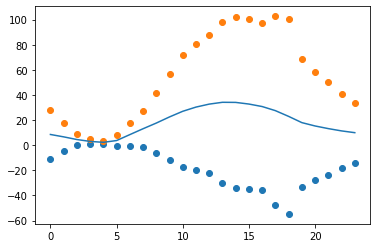

In [ ]:
plt.scatter(TEC_m['Hour'],TEC_m['varmin'])
plt.scatter(TEC_m['Hour'],TEC_m['varmax'])
plt.plot(TEC_m['Hour'],TEC_m['TEC'])
plt.show()

In [ ]:
s4_clean.index.hour

Int64Index([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
            18, 18, 18, 18, 18, 18, 18, 18, 18, 18],
           dtype='int64', name='date_time', length=8805946)

2
12
1
Sin datos
2
Sin datos
3
Sin datos
4
Sin datos
5
Sin datos
6
Sin datos


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


7
Sin datos
8
Sin datos
9
Sin datos
10
Sin datos
11
Sin datos
Sin datos
1
Sin datos
2
Sin datos
3
Sin datos
4
Sin datos
5
Sin datos
6
Sin datos
7
Sin datos
8
Sin datos
9
Sin datos
10
Sin datos
11
Sin datos
Sin datos
1
Sin datos
2
Sin datos
3
Sin datos
4
Sin datos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


5
Sin datos
6
Sin datos
7
Sin datos
8
Sin datos
9
Sin datos
10
Sin datos
11
Sin datos
Sin datos
1
Sin datos
2
Sin datos
3
Sin datos
4
Sin datos
5
Sin datos
6
Sin datos
7
Sin datos
8
Sin datos
9
Sin datos
10
Sin datos
11
Sin datos
Sin datos
1
Sin datos
2
Sin datos
3
Sin datos
4
Sin datos
5
Sin datos
6
Sin datos
7
Sin datos
8
Sin datos
9
Sin datos
10
Sin datos
11
Sin datos
Sin datos
1
Sin datos
2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Sin datos
3
Sin datos
4
Sin datos
5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Sin datos
6
Sin datos
7
Sin datos
8
Sin datos
9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Sin datos
10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Sin datos
11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Sin datos
Sin datos
1
Sin datos
2
Sin datos
3
Sin datos
4
Sin datos
5
Sin datos
6
Sin datos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


7
Sin datos
8
Sin datos
9
Sin datos
10
Sin datos
11
Sin datos
Sin datos
1
Sin datos
2
Sin datos
3
Sin datos
4
Sin datos
5
Sin datos
6
Sin datos
7
Sin datos
8
Sin datos
9
Sin datos
10
Sin datos
11
Sin datos
Sin datos


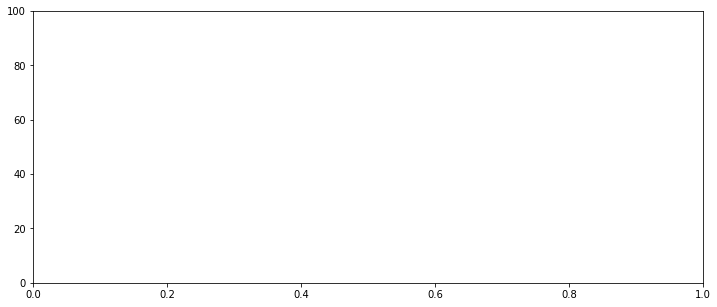

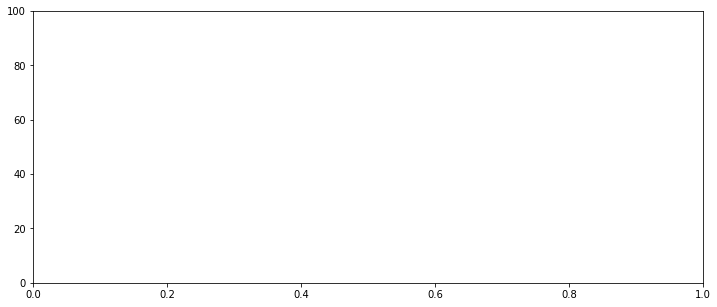

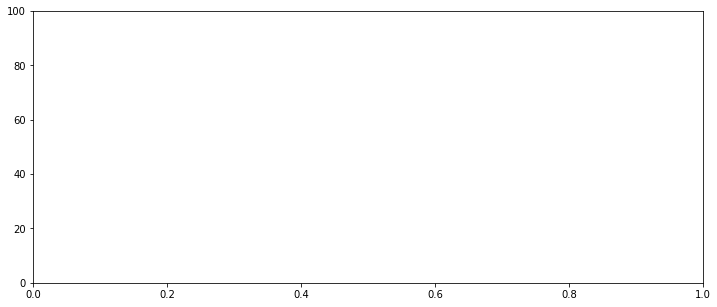

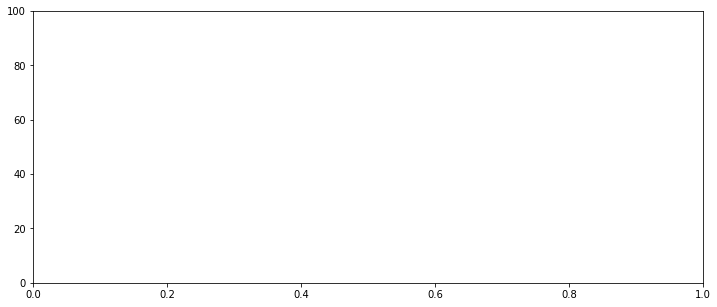

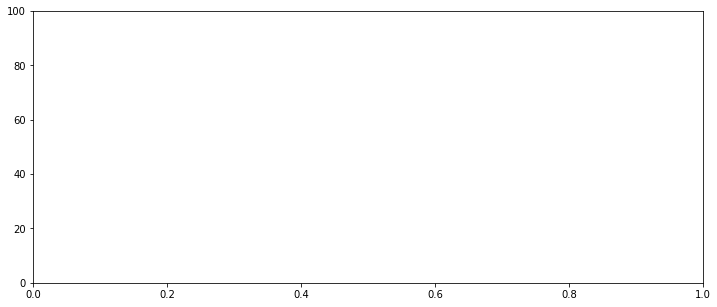

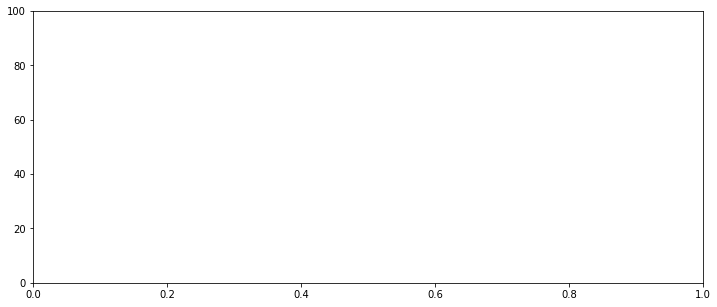

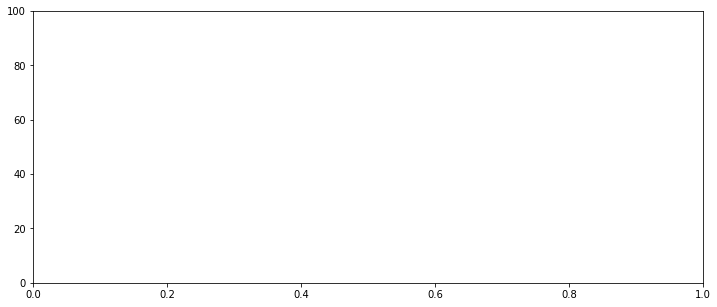

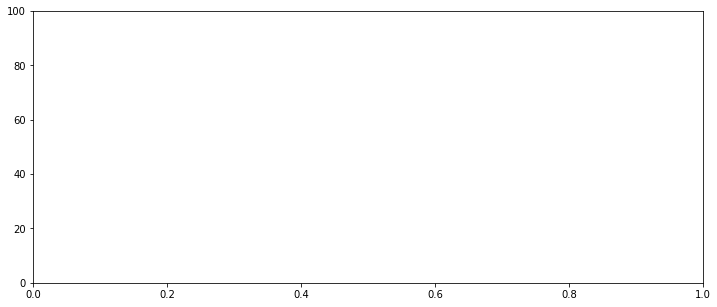

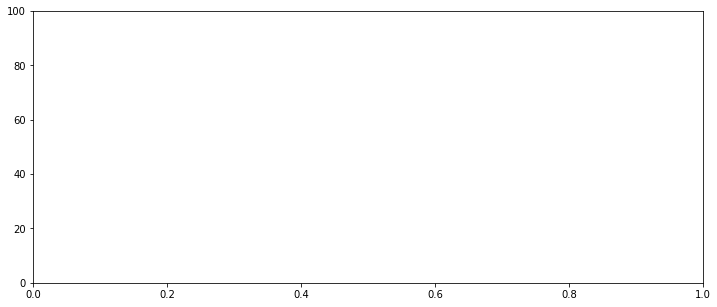

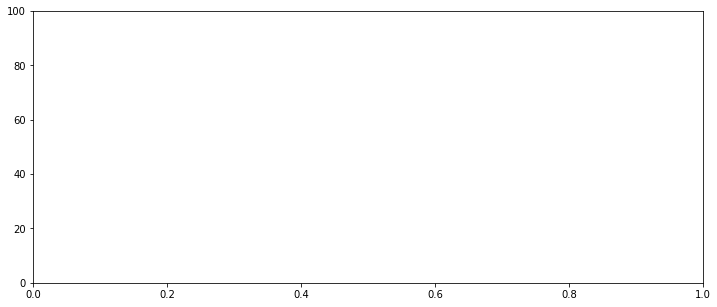

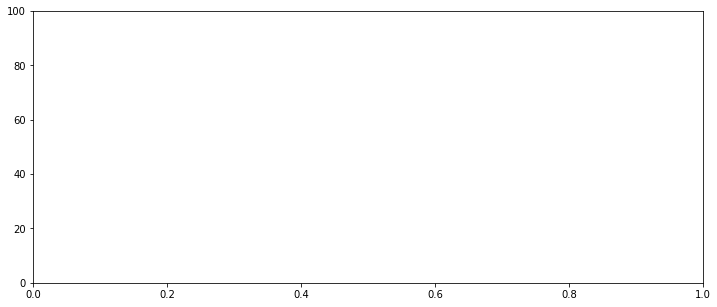

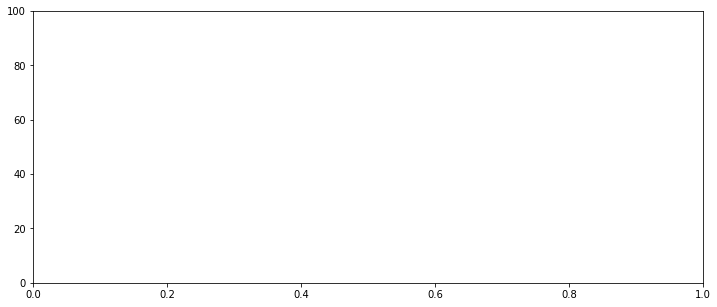

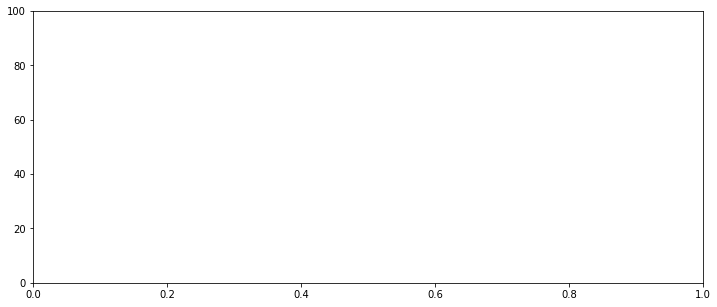

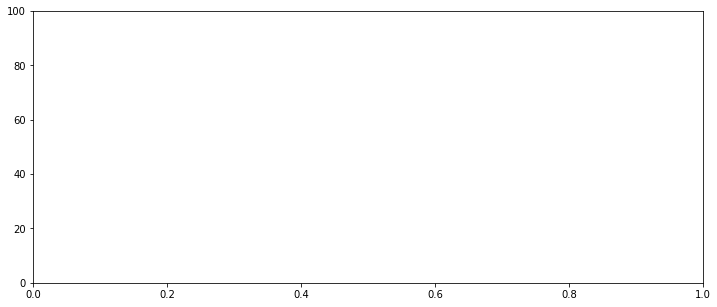

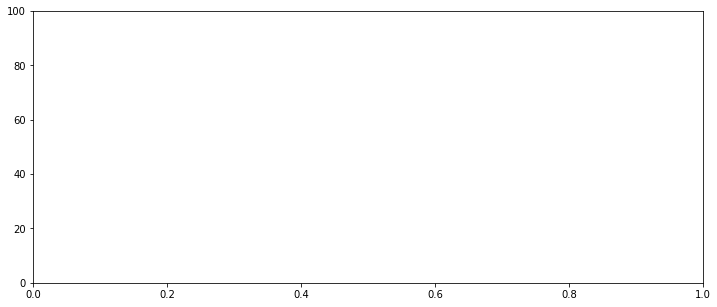

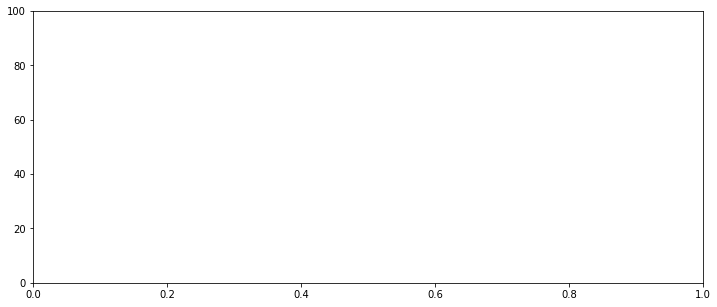

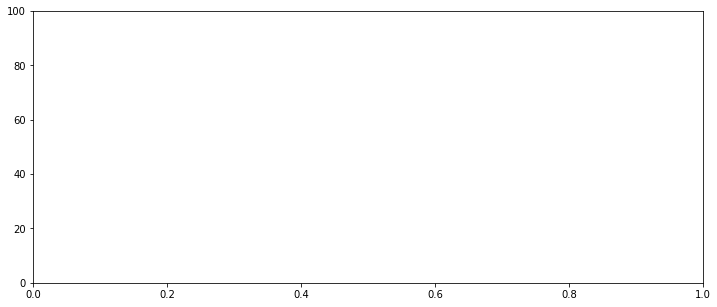

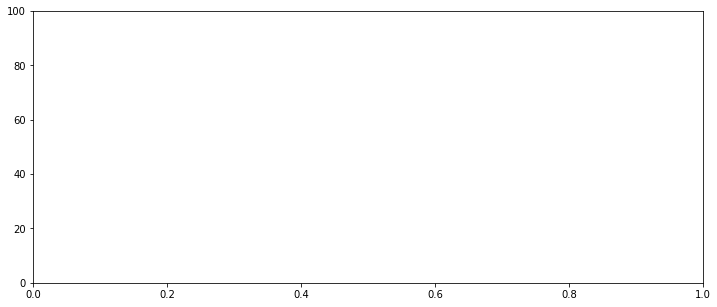

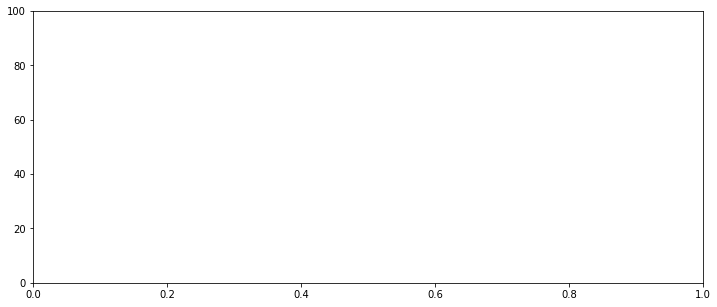

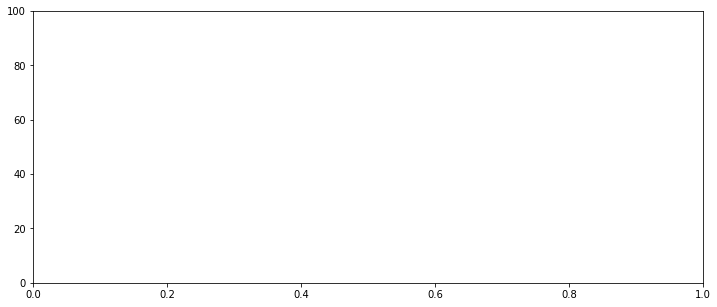

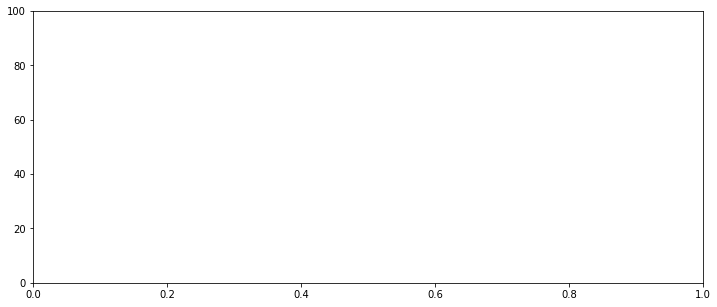

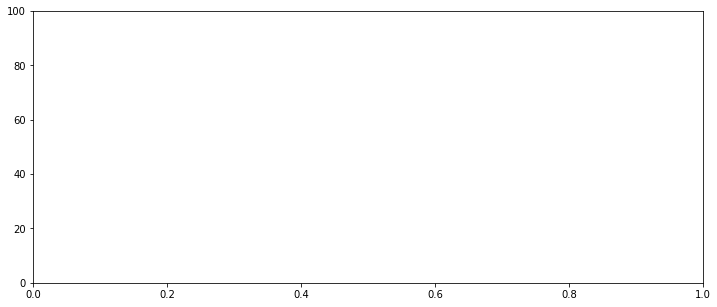

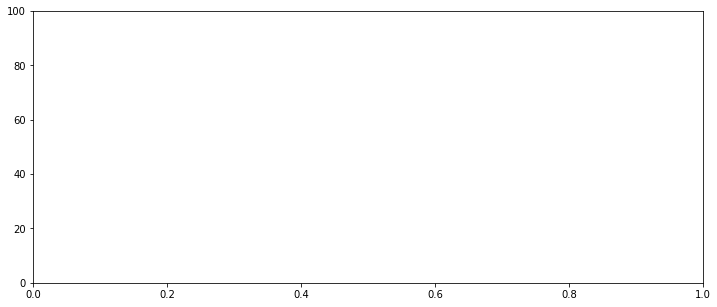

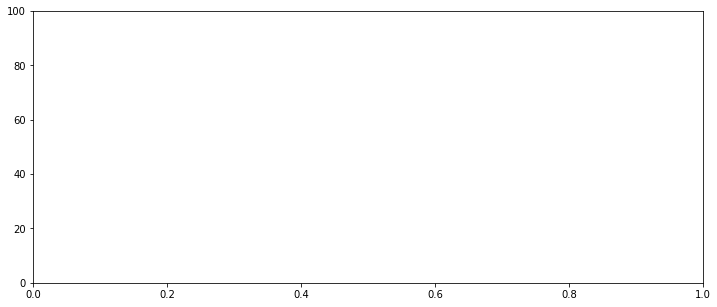

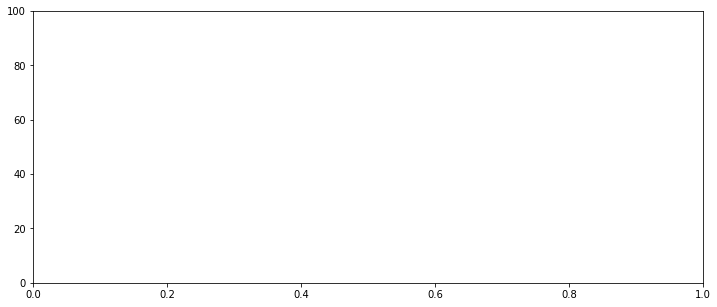

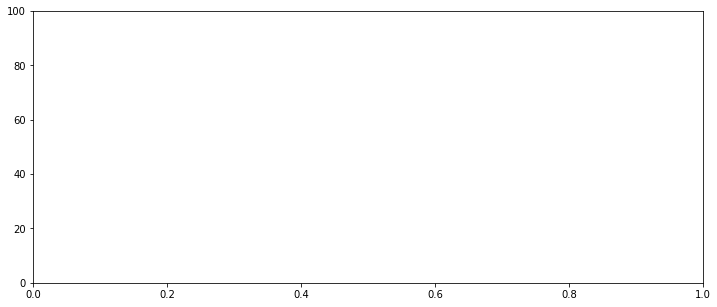

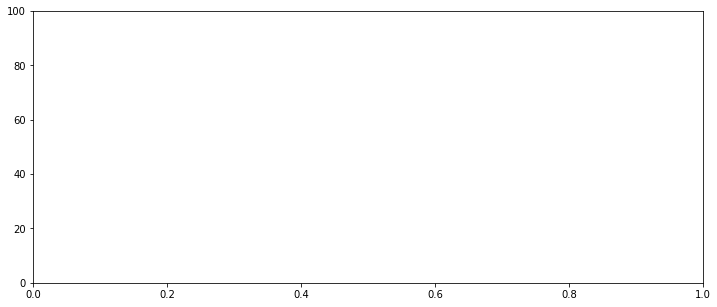

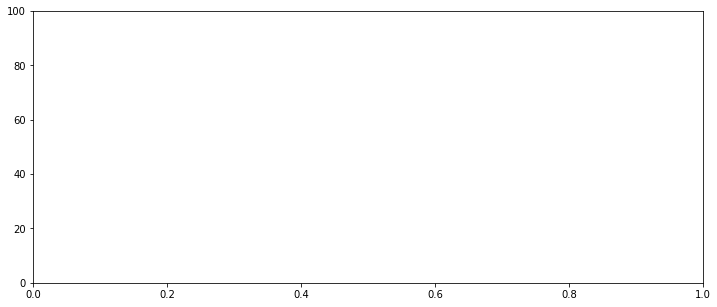

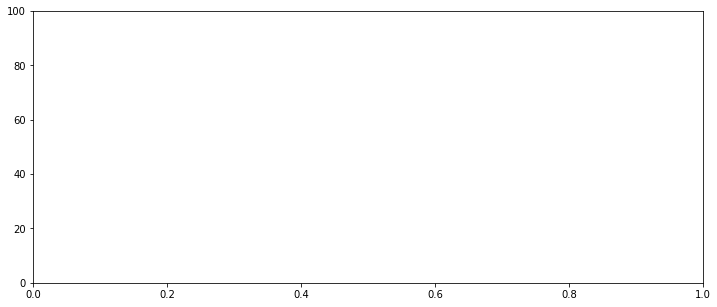

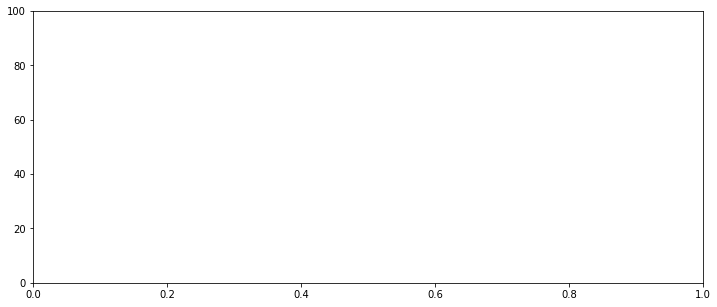

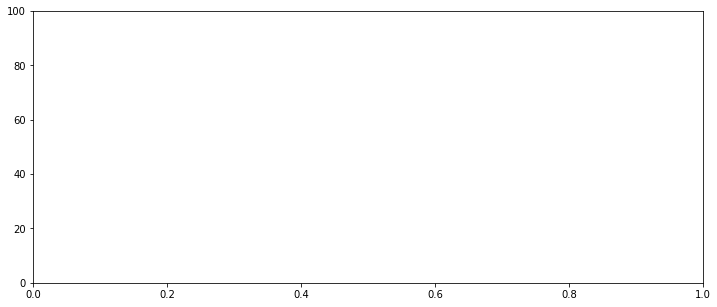

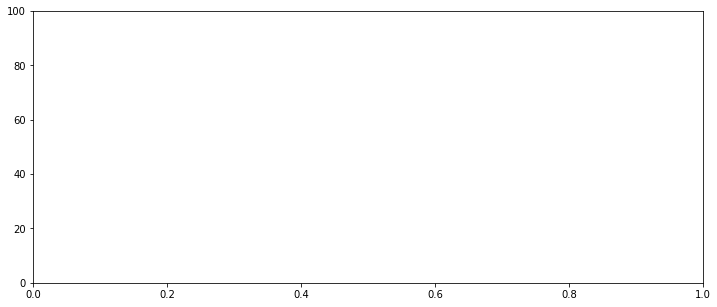

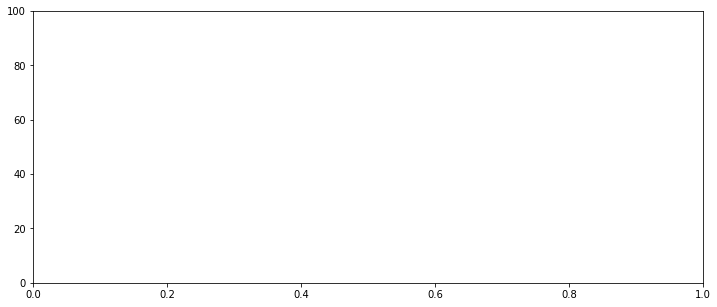

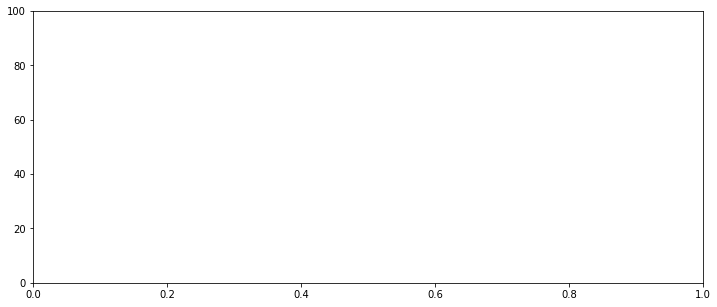

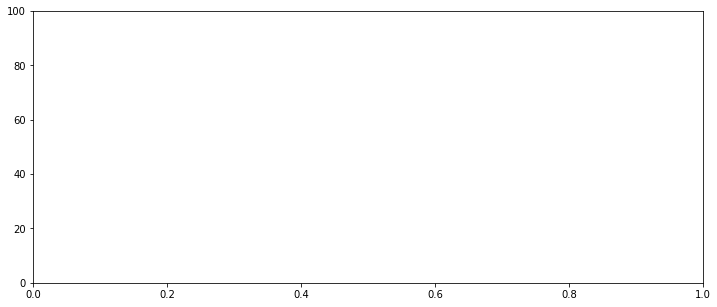

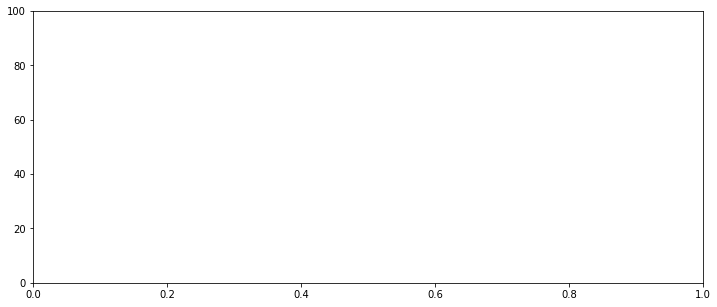

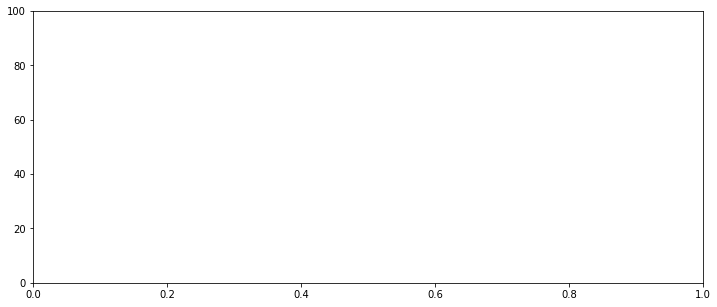

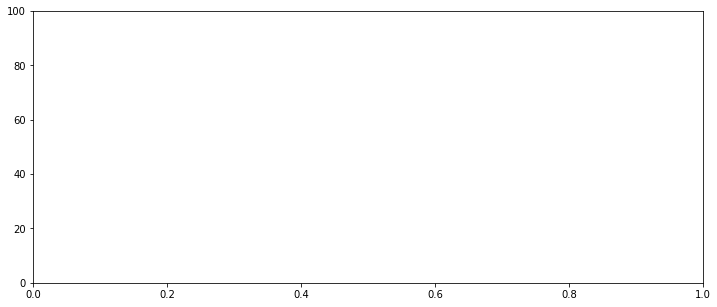

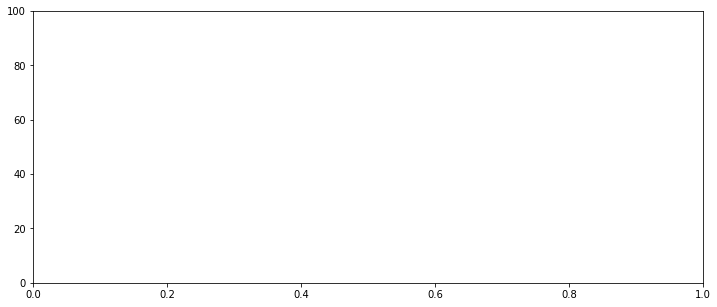

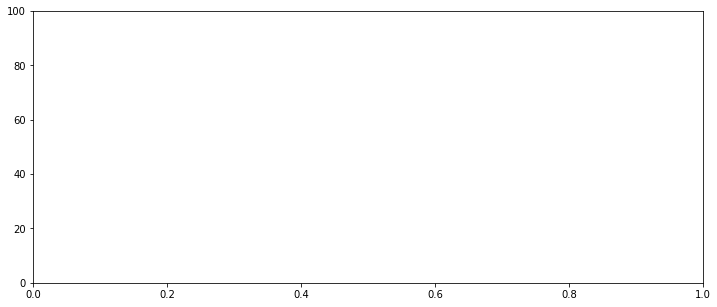

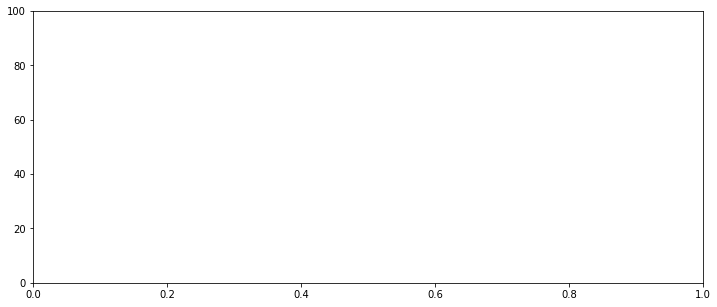

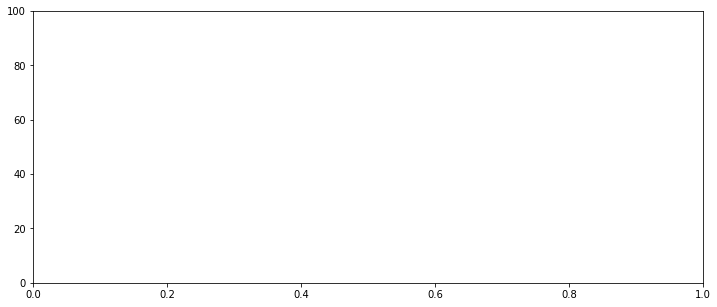

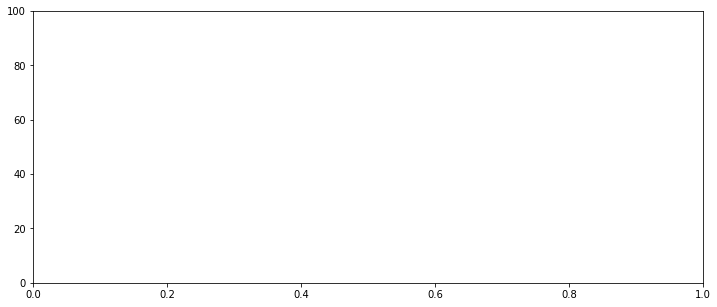

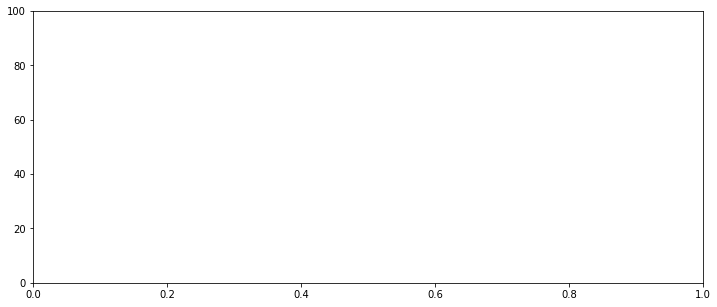

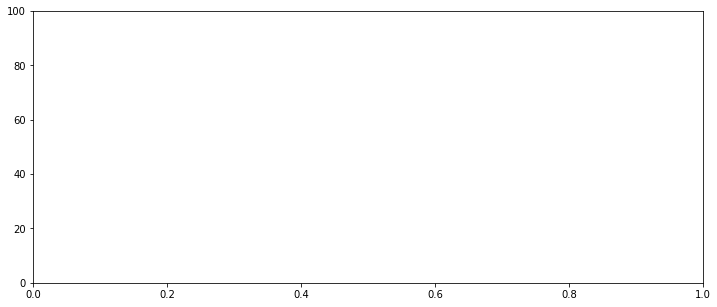

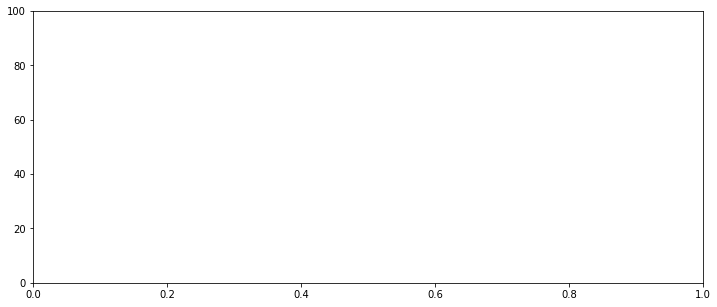

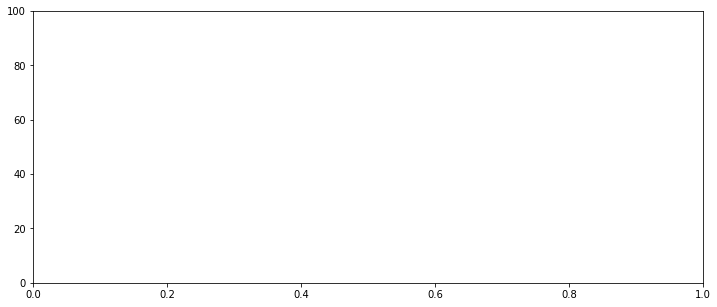

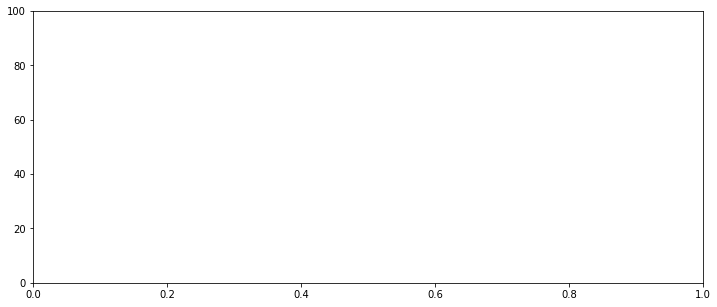

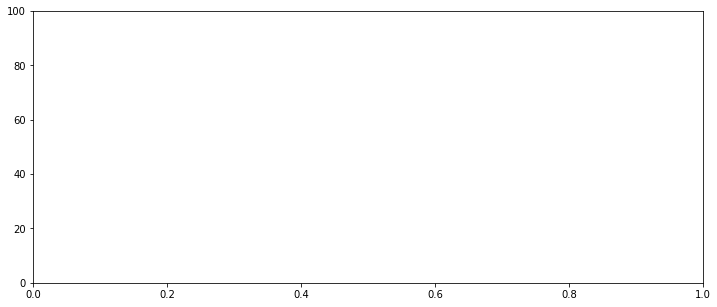

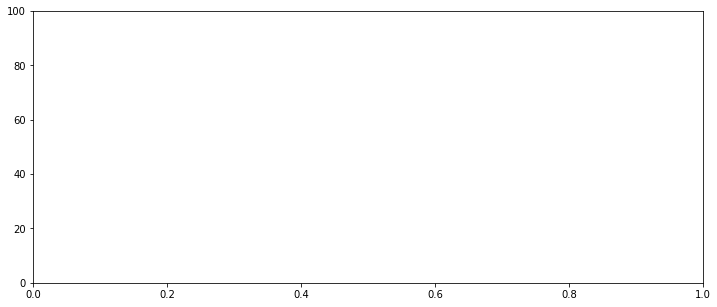

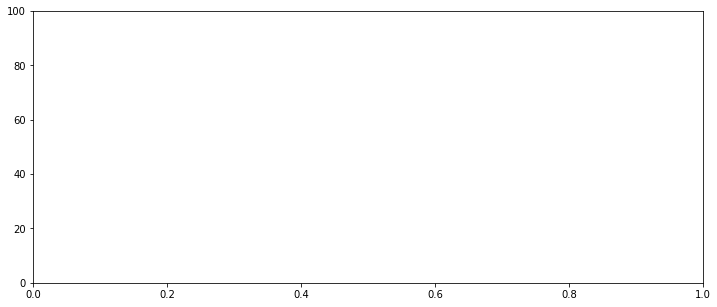

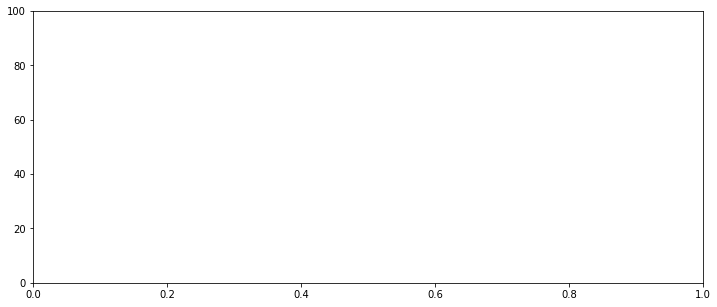

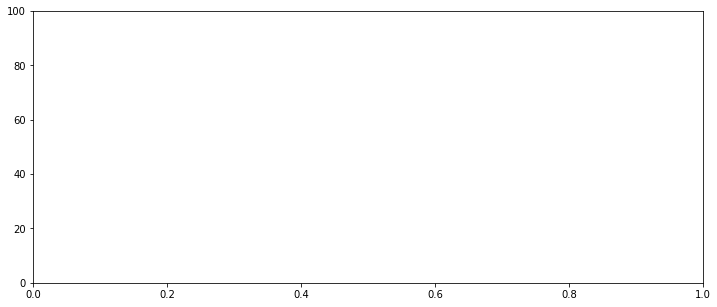

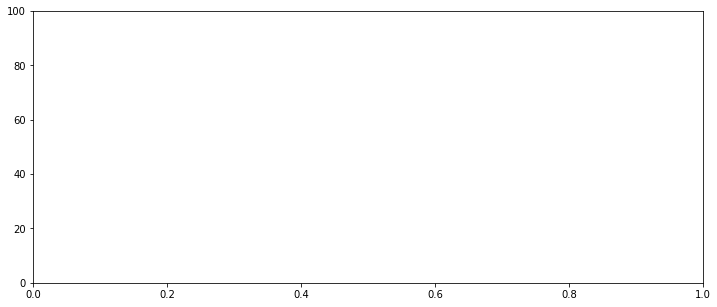

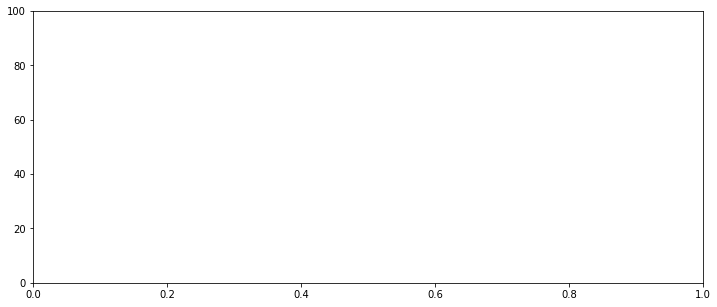

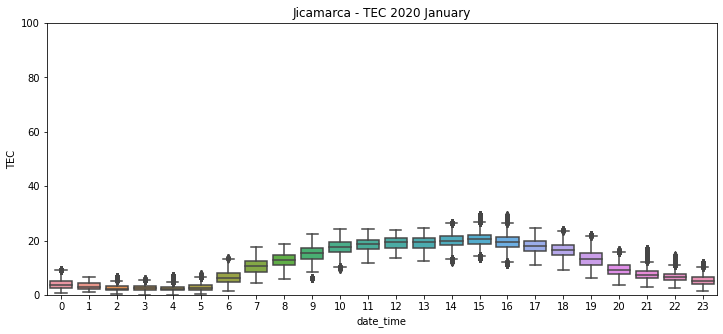

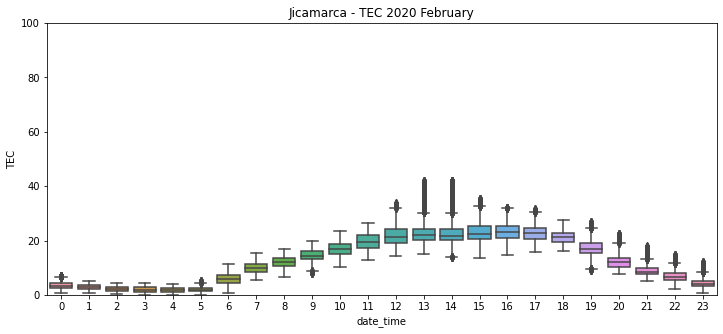

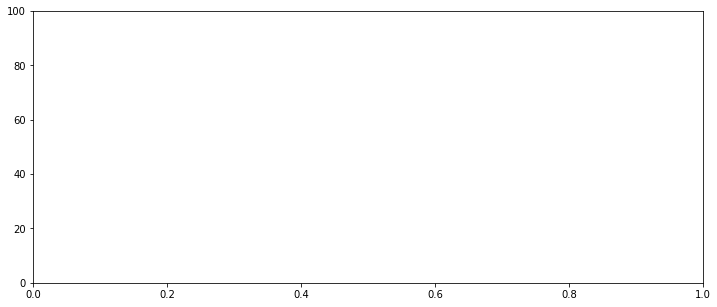

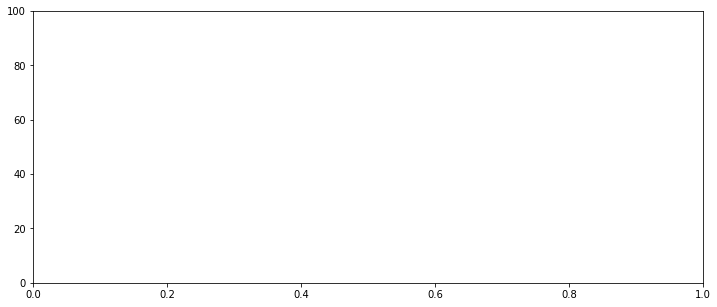

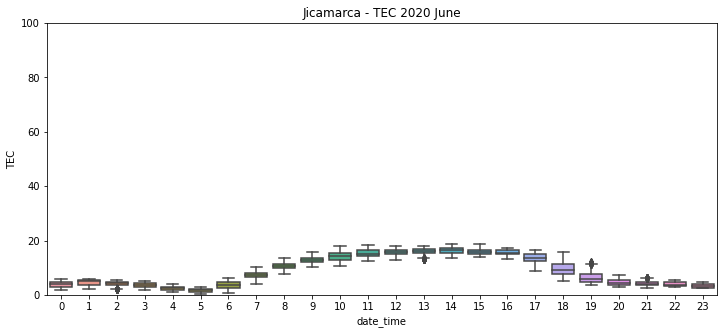

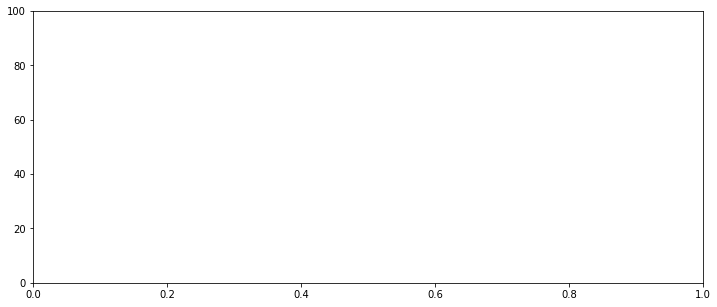

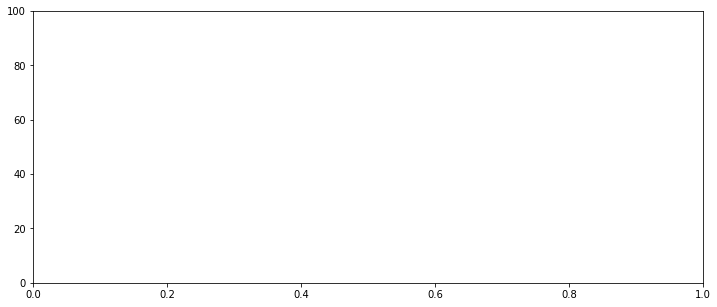

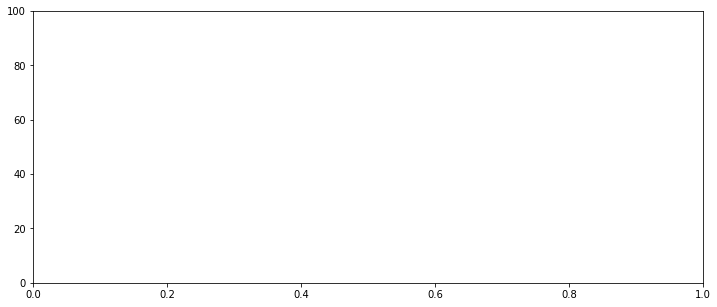

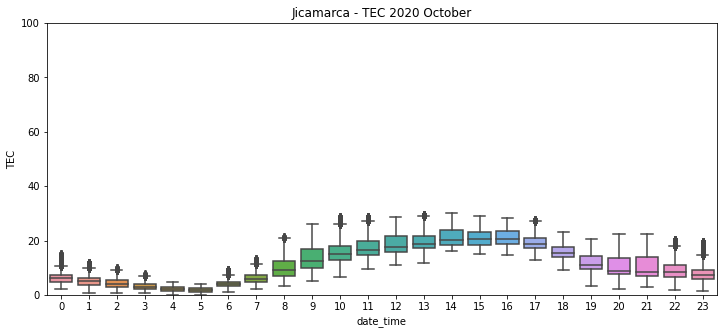

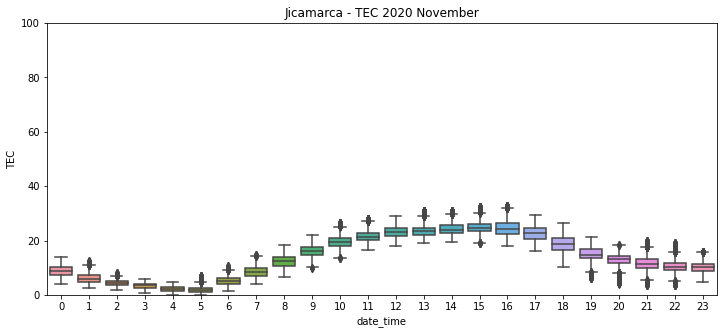

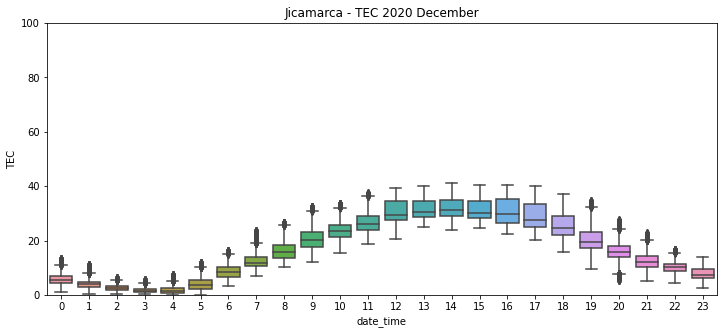

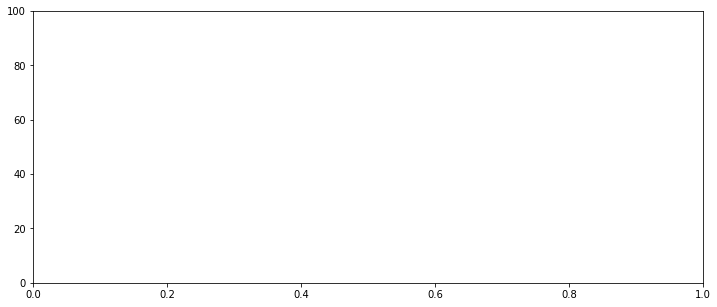

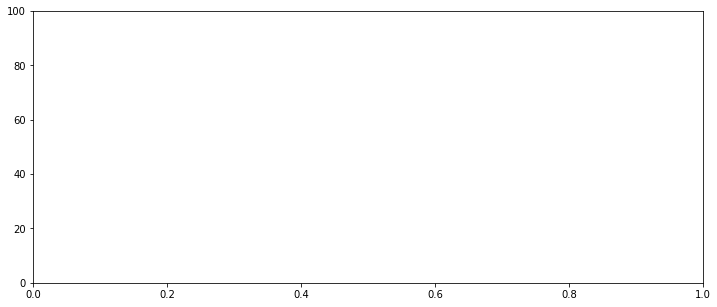

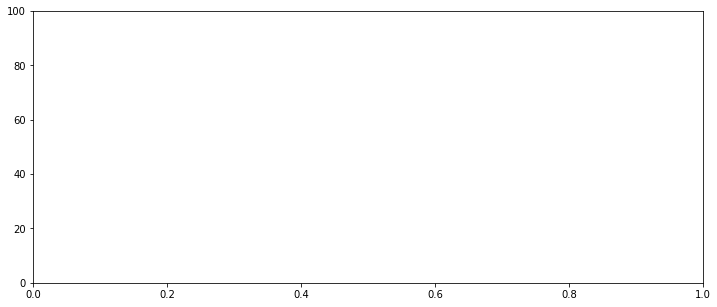

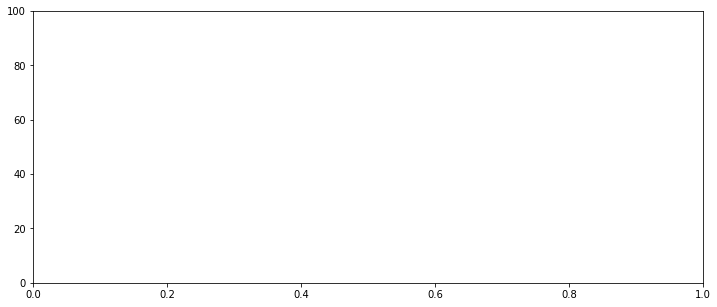

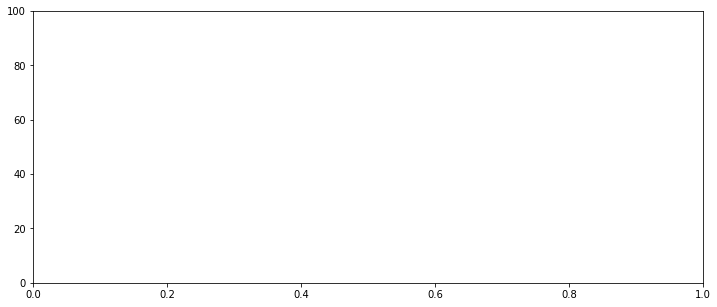

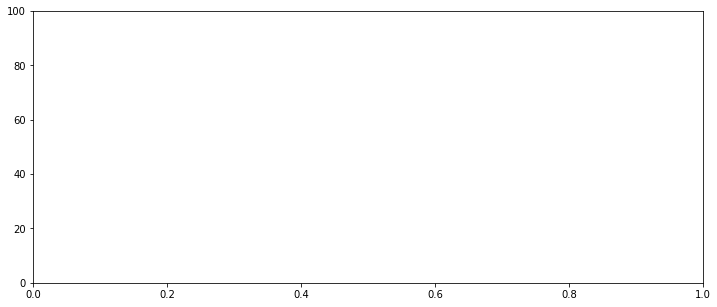

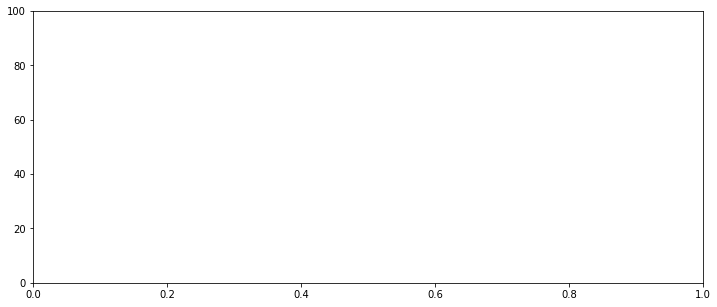

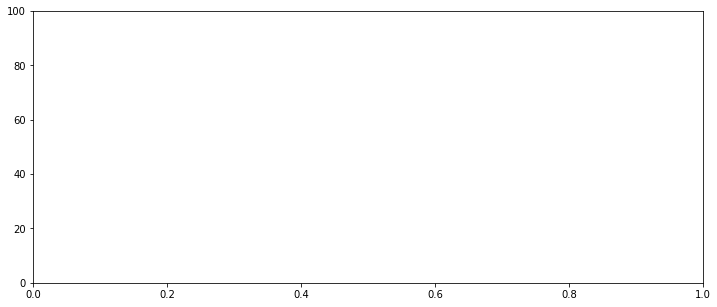

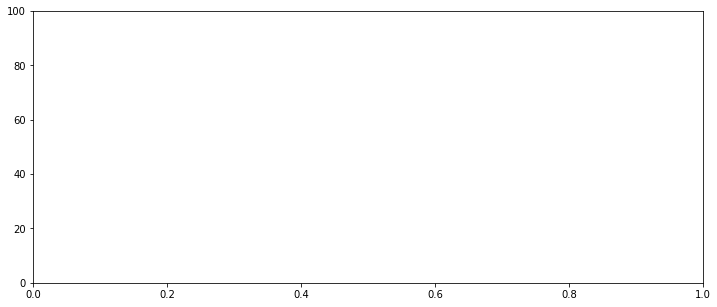

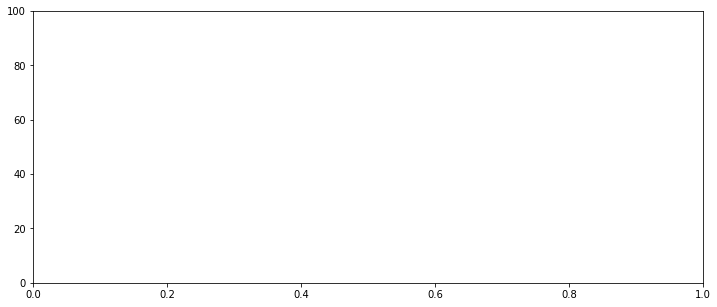

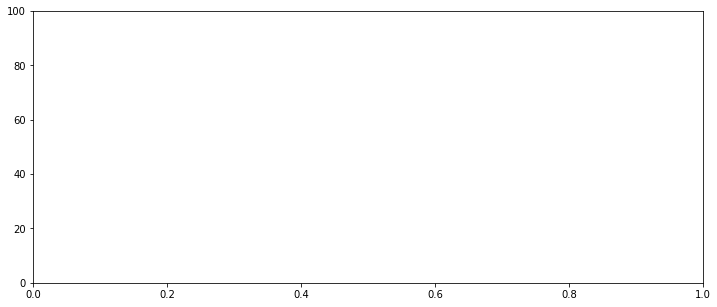

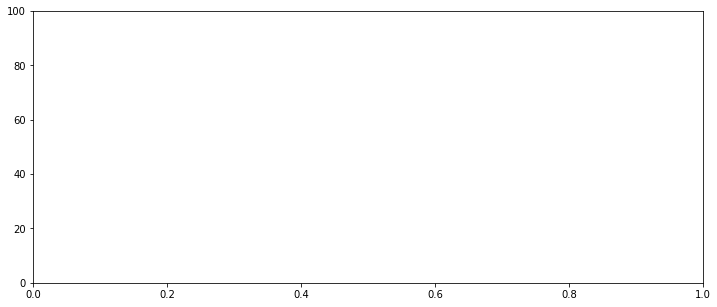

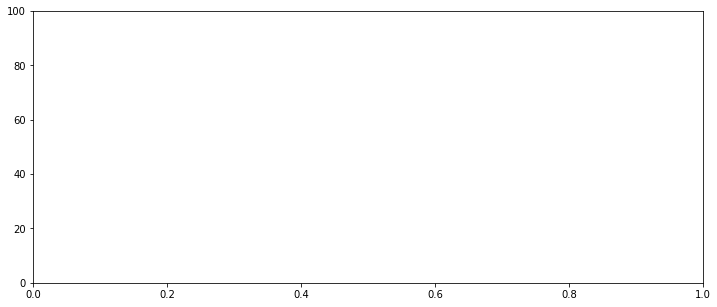

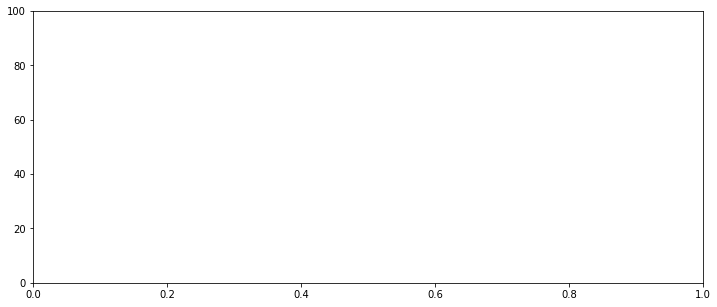

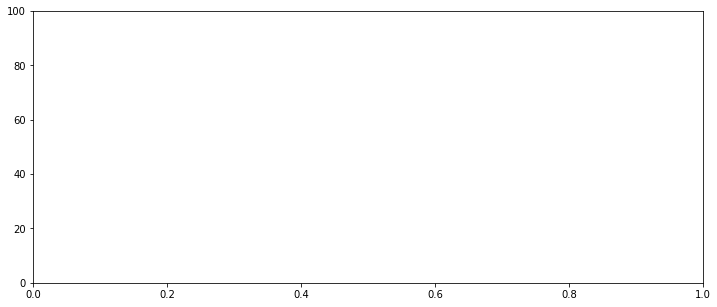

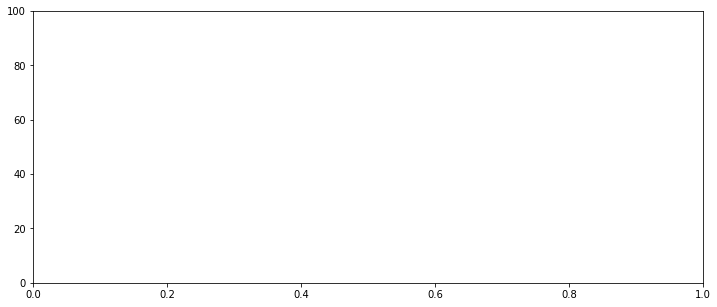

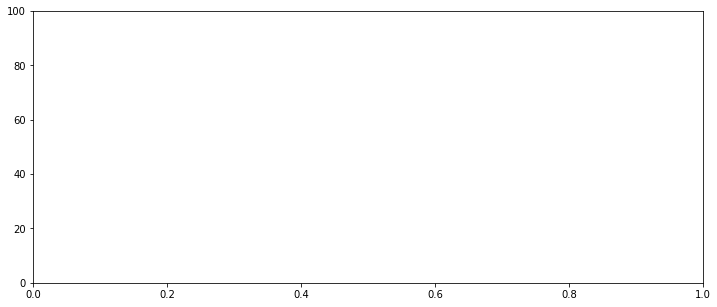

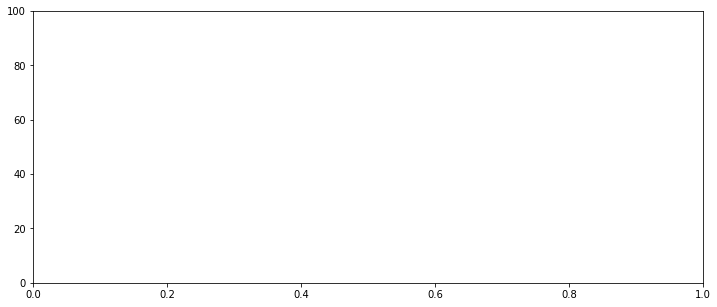

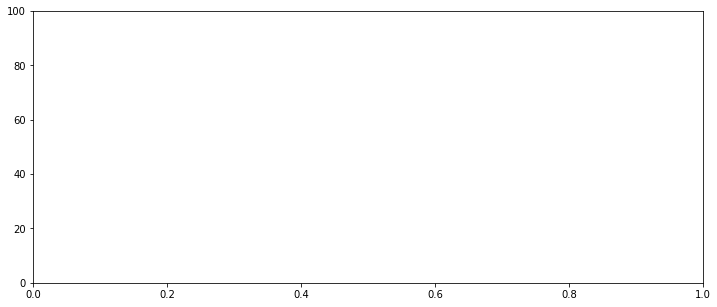

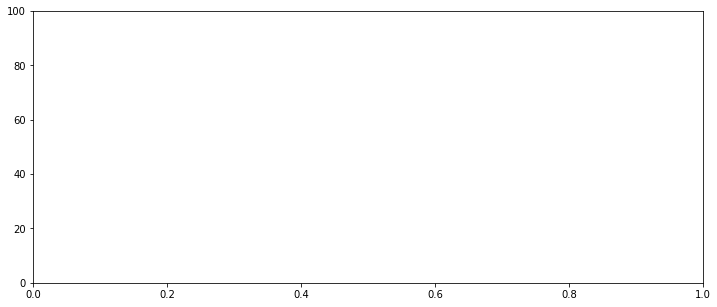

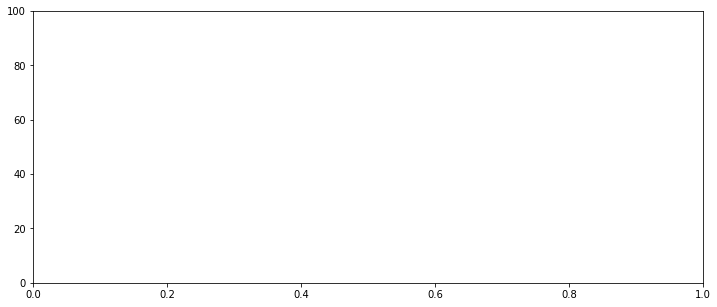

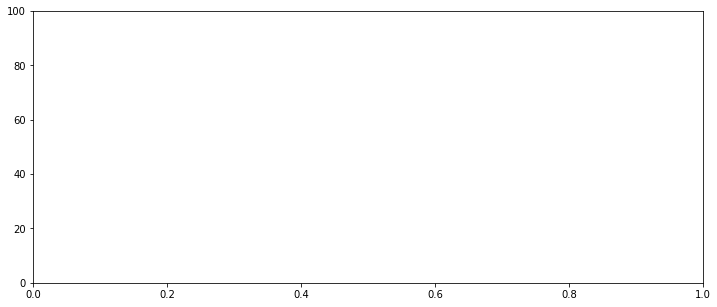

In [ ]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from datetime import datetime





fechas=[[1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','June','July','August','Spetember','October','November','December']]
print(fechas[0][1])
print(len(fechas[0]))
years=[2015,2016,2017,2018,2019,2020,2021,2022]
for year in years:
  for i in range(12):
    try:
      if i==12:
        s4_clean_per=s4_clean[(s4_clean.index > datetime(year, i+1, 1,00, 00,00)) & (s4_clean.index < datetime(year+1, 1, 1,00, 00,00))]
      else:
        s4_clean_per=s4_clean[(s4_clean.index > datetime(year, i+1, 1,00, 00,00)) & (s4_clean.index < datetime(year, i+2, 1,00, 00,00))]


        print(fechas[0][i])


      fig, ax = plt.subplots(figsize=(12,5))
      plt.ylim([0, 100])
      seaborn.boxplot(s4_clean_per.index.hour, s4_clean_per["TEC"], ax=ax).set(title='Jicamarca - TEC '+str(year)+' '+str(fechas[1][i])).set(

    xlabel='Local Time',
    ylabel='TECu'
)

      plt.savefig("/content/gdrive/My Drive/Data-completa/Graficos-paper-2022-1/"+'Jicamarca - TEC '+str(year)+' '+str(fechas[1][i])+".png")
      plt.show()

    except:
      print('Sin datos')

In [ ]:
plt.show()

In [ ]:
Moday=s4_night[["S4"]].resample("10min").max().index.hour*60+s4_night[["S4"]].resample("10min").max().index.minute
print(Moday)

In [ ]:
# create an Empty DataFrame object
df2 = pd.DataFrame()
df2['date_time'] = pd.to_datetime((s4_night[["S4"]].resample("10min").max().index.hour.values), format='%H')+pd.to_timedelta(s4_night[["S4"]].resample("10min").max().index.minute.values, unit='m')
df2['hour'] = s4_night[["S4"]].resample("10min").max().index.hour.values
print(df2)

KeyError: ignored

In [ ]:
# create an Empty DataFrame object
df2 = pd.DataFrame()
df2['date_time'] = pd.to_datetime((s4_night[["S4"]].resample("10min").max().index.hour.values), format='%H')+pd.to_timedelta(s4_night[["S4"]].resample("10min").max().index.minute.values, unit='m')
df2['hour'] = s4_night[["S4"]].resample("10min").max().index.hour.values
ydateax=df2['date_time'].apply(lambda x: x if x.hour >= 8 else x+pd.Timedelta(days=1))
print(ydateax)

KeyError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sam=("5min")
df2 = pd.DataFrame()
df2['date_time'] = pd.to_datetime((s4_night[["S4"]].resample(sam).max().index.hour.values), format='%H')+pd.to_timedelta(s4_night[["S4"]].resample(sam).max().index.minute.values, unit='m')
df2['hour'] = s4_night[["S4"]].resample(sam).max().index.hour.values
ydateax=df2['date_time'].apply(lambda x: x if x.hour >= 6 else x+pd.Timedelta(days=1))

fig = plt.figure(figsize=(15, 15))

plt.scatter(s4_night[["S4"]].resample(sam).max().index, ydateax,

           c=s4_night[["S4"]].resample(sam).max().values)

plt.colorbar()
plt.show()


KeyError: ignored

In [ ]:
from matplotlib import colors
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as md
import datetime as dtt


import matplotlib.pyplot as plt
def plot_s4_max(df_s4,est,año,sam="5min",var="S4",range=[0,0.5]):
  #Graficar el S4 maximo de un arreglo ("df_s4") cada cierto periodo ("sam"). Para el año y la estación ("est")

  # Set the font size for x tick labels
  plt.rc('xtick', labelsize=32)
  # Set the font size for y tick labels
  plt.rc('ytick', labelsize=30)


  plt.rc('axes', labelsize=30)

  plt.rc('axes', titlesize=40)

  fig, ax = plt.subplots(figsize=(40, 15))


  df2 = pd.DataFrame()
  df2['date_time'] = pd.to_datetime((df_s4[[var]].resample(sam).max().index.hour.values), format='%H')+pd.to_timedelta(df_s4[[var]].resample(sam).max().index.minute.values, unit='m')
  df2['hour'] = df_s4[[var]].resample(sam).max().index.hour.values
  ydateax=df2['date_time'].apply(lambda x: x if x.hour >= 6 else x+pd.Timedelta(days=1))

  mycmap = plt.cm.get_cmap('rainbow',20)
  sc=ax.scatter(df_s4[[var]].resample(sam).max().index, ydateax,
            #s=s4_night[["S4"]].resample(sam).max().values*200,
            c=df_s4[[var]].resample(sam).max().values, cmap=mycmap, vmin = range[0], vmax =range[1])

  ax.yaxis.set_major_locator(md.HourLocator(interval = 1))
  ax.yaxis.set_major_formatter(md.DateFormatter('%H'))
  ax.xaxis.set_major_locator(md.MonthLocator())
  ax.xaxis.set_major_formatter(md.DateFormatter('%b'))
  ax.set_ylim(datetime(year = 1900, month = 1, day = 1, hour = 6, minute = 0, second = 0),
              datetime(year = 1900, month = 1, day = 2, hour = 0, minute = 0, second = 0))
  ax.set_ylabel(r'LT')
  #ax.set_xlabel(r'Month')


  ax.set_xlim([dtt.date(año, 1, 1), dtt.date(año, 12, 31)])

  cbar = fig.colorbar(sc)
  cbar.set_label(var)
  #plt.clim(0, 0.5)
  plt.title(est+' '+str(año))
  #plt.savefig(est+' '+str(año)+'.png')
  plt.show()


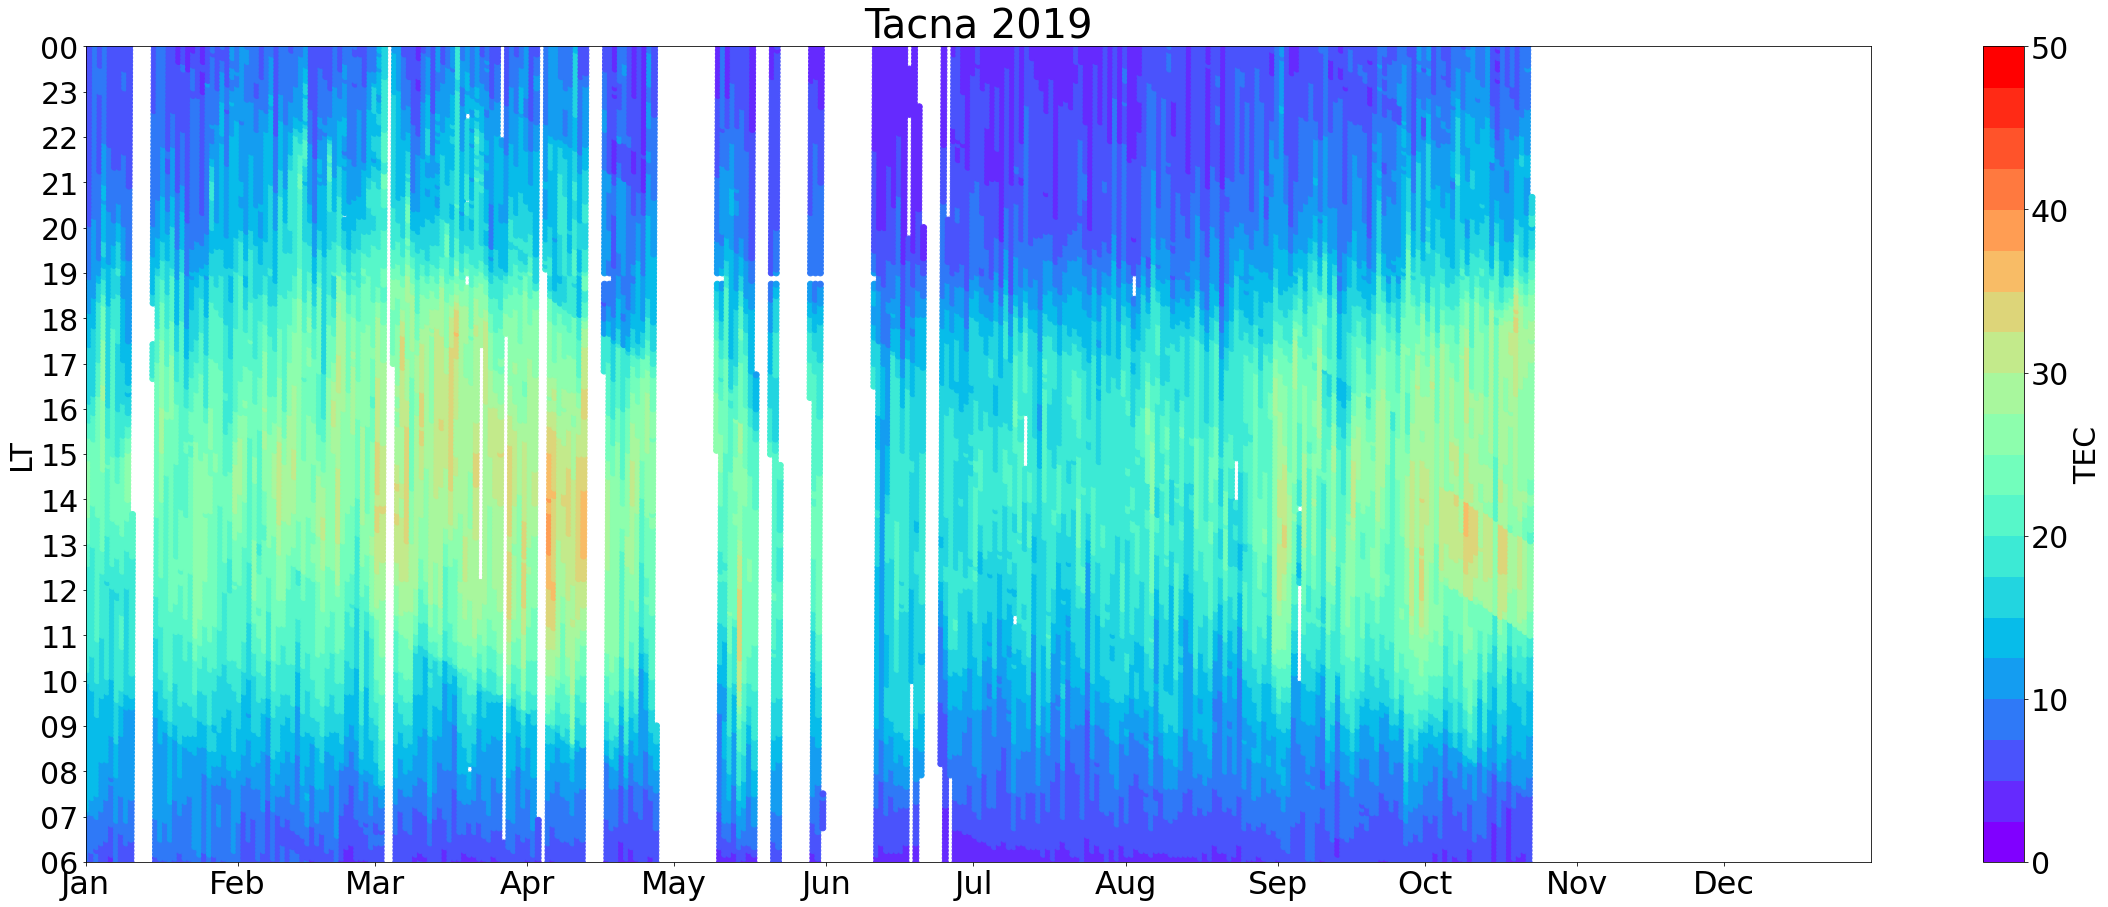

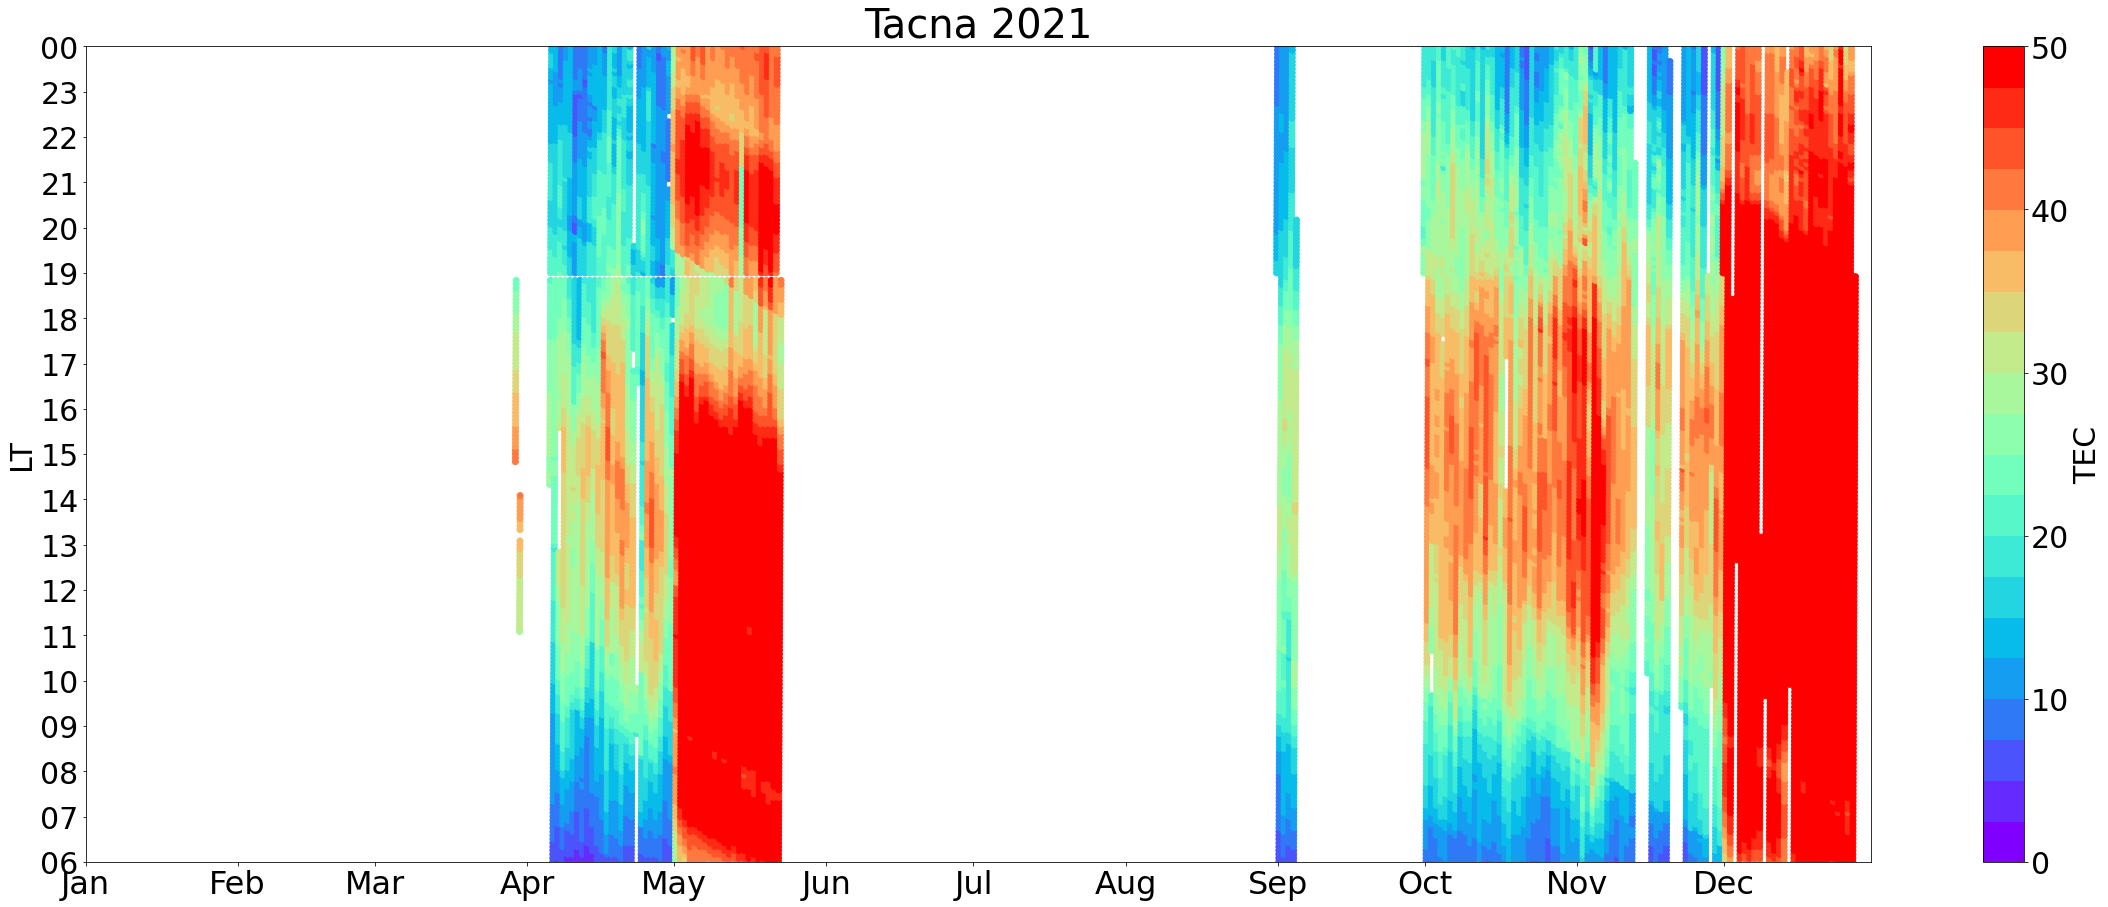

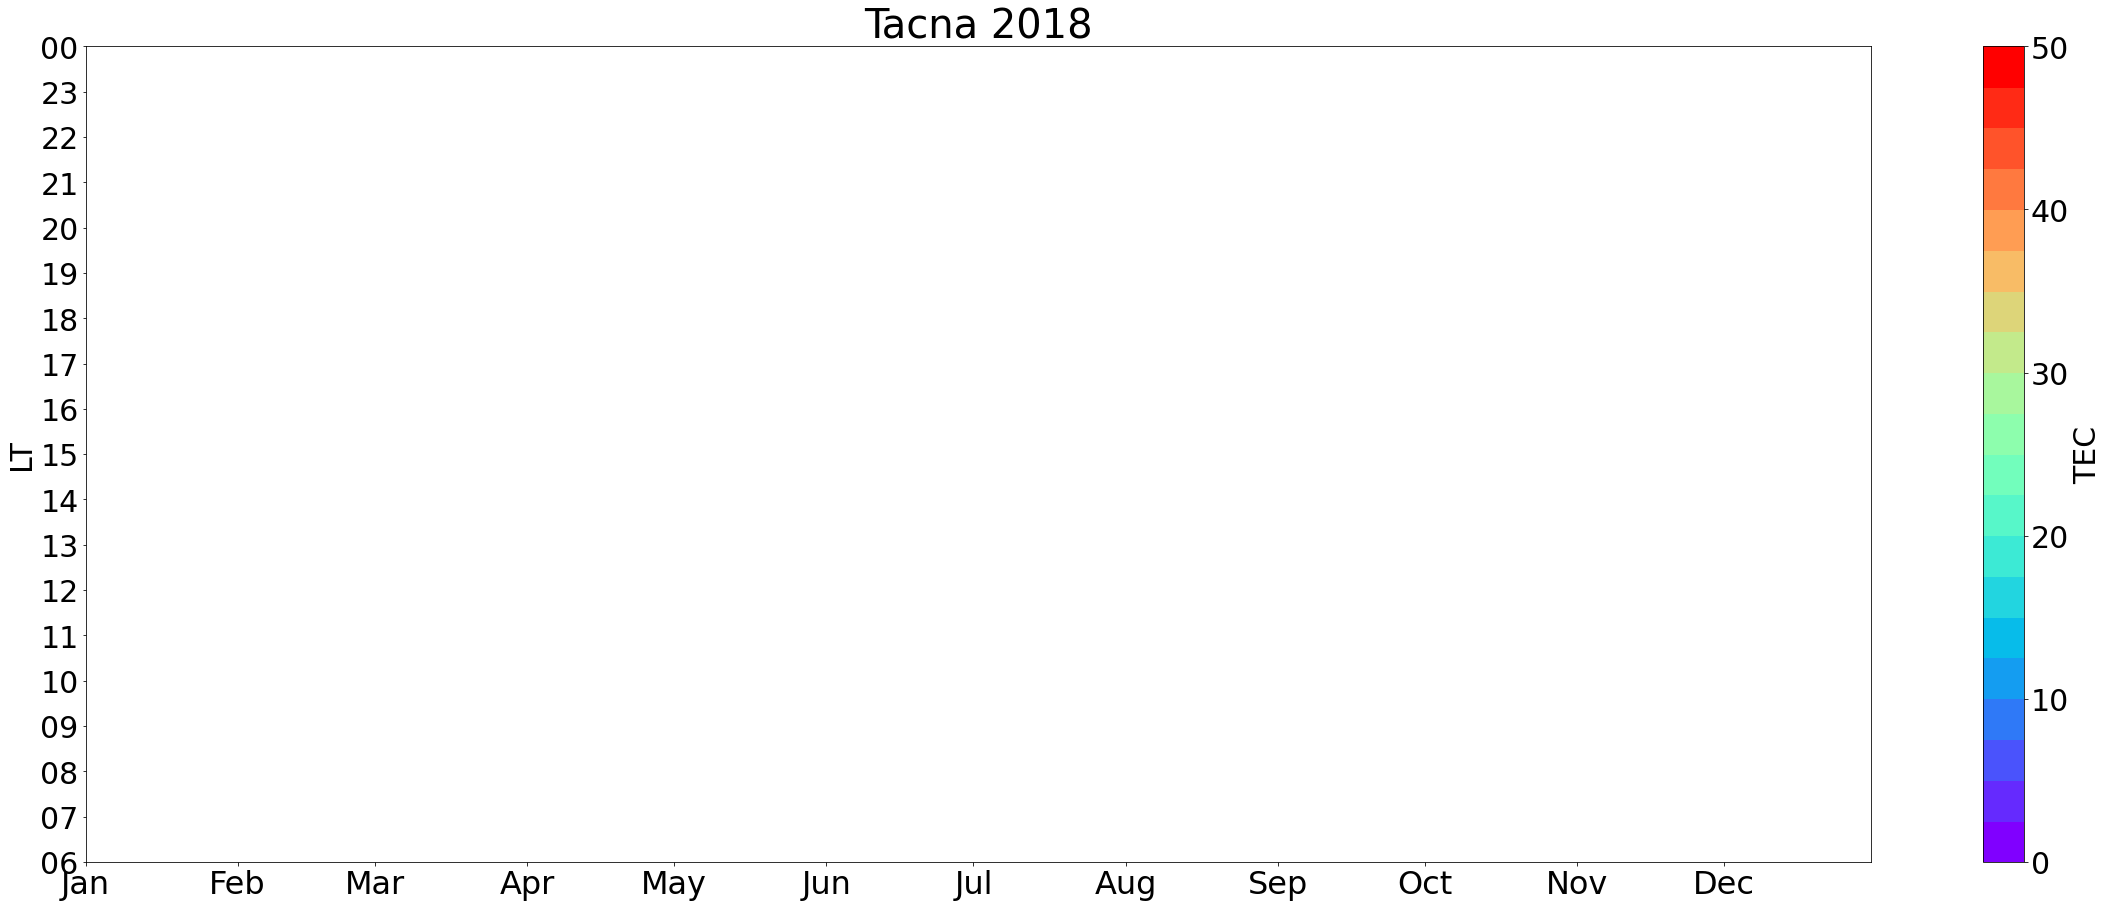

In [ ]:
for i in pd.unique(s4_night.index.year):
  s4_year=s4_night[s4_night.index.year==i]
  plot_s4_max(s4_clean,'Tacna',i,sam="5min",var="TEC",range=[0,50])

In [ ]:
from matplotlib import colors
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as md
import datetime as dtt


import matplotlib.pyplot as plt
# Set the font size for x tick labels
plt.rc('xtick', labelsize=24)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=22)


plt.rc('axes', labelsize=30)

plt.rc('axes', titlesize=30)

fig, ax = plt.subplots(figsize=(60, 20))

sam=("5min")

mycmap = plt.cm.get_cmap('rainbow',20)
sc=ax.scatter(s4_night[["S4"]].resample(sam).max().index, ydateax,
           s=s4_night[["S4"]].resample(sam).max().values*200,
           c=s4_night[["S4"]].resample(sam).max().values, cmap=mycmap, vmin = 0, vmax =0.5)

ax.yaxis.set_major_locator(md.HourLocator(interval = 1))
ax.yaxis.set_major_formatter(md.DateFormatter('%H'))
ax.xaxis.set_major_locator(md.MonthLocator())
ax.xaxis.set_major_formatter(md.DateFormatter('%b'))
ax.set_ylim(datetime(year = 1900, month = 1, day = 1, hour = 19, minute = 0, second = 0),
            datetime(year = 1900, month = 1, day = 2, hour = 6, minute = 0, second = 0))
ax.set_ylabel(r'LT')
#ax.set_xlabel(r'Month')


ax.set_xlim([dtt.date(2020, 1, 1), dtt.date(2020, 12, 31)])

cbar = fig.colorbar(sc)
cbar.set_label("S4")
#plt.clim(0, 0.5)
plt.title('Huancayo 2020')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as md


df = pd.read_csv(r'data/data.csv')


def start(x):
    H, M, S = list(map(int, x['Start'].split(':')))
    Y, m, d = 2000, 1, 1
    if H > 12:
        return datetime(year = Y, month = m, day = d, hour = H, minute = M, second = S)
    else:
        return datetime(year = Y, month = m, day = d, hour = H, minute = M, second = S) + timedelta(days = 1)


df['Start'] = df.apply(start, axis = 1)

df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')


fig, ax = plt.subplots()

for i, row in df.iterrows():
    ax.plot([row['Date'], row['Date']], [row['Start'], row['End']], linewidth = 10, color = 'blue')

ax.xaxis.set_major_locator(md.DayLocator(interval = 1))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)


ax.yaxis.set_major_locator(md.HourLocator(interval = 1))
ax.yaxis.set_major_formatter(md.DateFormatter('%H:%M'))
ax.set_ylim(datetime(year = 2000, month = 1, day = 1, hour = 20, minute = 0, second = 0),
            datetime(year = 2000, month = 1, day = 2, hour = 12, minute = 0, second = 0))

plt.show()

In [ ]:
#saturar
#escala de azul, rojo / paleta rainbow
#ecos 50

In [ ]:
s4_night[["S4"]].resample("1d").max().plot(subplots=True, figsize=(15,4),title='Maximun S4 per day')
s4_night[["S4"]].resample("1d").quantile(q=0.95).plot(subplots=True, figsize=(15,4),title='Percentil 95 of S4 per day')


In [ ]:
s4_night[s4_night["S4"]>0.3]["S4"].resample("1d").count().plot(subplots=False, figsize=(15,4),title='Number of ocurrences of S4 over 0.3 per day')


In [ ]:
s4_night[s4_night["S4"]>0.5]["S4"].resample("1d").count().plot(subplots=False, figsize=(15,4),title='Number of ocurrences of S4 over 0.5 per day')

In [ ]:

s4_night['per'] = s4_night.index.to_period('M')
s4_night.boxplot(by='per',column=["S4"],figsize=(15, 4),showfliers=False)

In [ ]:
#X1 = s4_night[s4_night["S4"]>0.3]["S4"].resample("1d").count()



X2 = s4_night[s4_night["S4"]]["S4"].quantile(q=0.2)
print(X2)

In [ ]:
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt



import matplotlib
from google.colab import files


import matplotlib.dates as mdates


fig, ax1 = plt.subplots(figsize=(20,6))

fig.suptitle("Estación de Huancayo")


X = s4_night[["S4"]].resample("1d").resample("1d").count()
Y = s4_night[["S4"]].resample("1d").resample("1d").count().index

X1 = s4_night[s4_night["S4"]>0.3]["S4"].resample("1d").count()
Y1 = s4_night[s4_night["S4"]>0.3]["S4"].resample("1d").count().index


X2 = SW['f10.7_index'].resample("15d").quantile(q=0.2)
Y2 = SW['f10.7_index'].resample("15d").quantile(q=0.2).index
color = 'tab:olive'



ax1.tick_params(axis='x',labelsize=14)
ax1.set_ylabel('S4',fontsize=20)
# convert the epoch format to matplotlib date format

ax1.tick_params(axis='x',labelsize=14)
ax1.tick_params(axis='y',labelsize=14)
ax1.set_title("Cintilaciones (Nro. de S4>0.3) /f10.7_index-Huancayo",size=18)



# plot the two cases side by side


lns1=ax1.plot(Y1,X1, label='S4',marker='o')

lns1=ax1.plot(Y1,X1, label='# S4')

# pretty up the xaxis labels
myFmt = mdates.DateFormatter('%m-%d %H')
ax1.xaxis.set_major_formatter(myFmt)






ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis




ax2.set_xlabel('Hora Local', fontsize=20)
#ax1.set_ylabel('Kpx10', color=color,fontsize=20)
ax2.set_ylabel('f10.7_index',fontsize=20)

#ax.hist2d(Y1, X1, (80, 20), cmap=plt.cm.jet)
lns2=ax2.plot(Y2,X2,color='r', label='f10.7_index')

ax2.tick_params(axis='x',labelsize=14)
#ax1.format_xdata = mdates.DateFormatter('%m-%d')
#ax1.xaxis.set_major_locator(plt.MaxNLocator(8))
myFmt = mdates.DateFormatter('%y-%m')
ax2.xaxis.set_major_formatter(myFmt)

#ax1.set_ylim(0,2)
#ax1.tick_params(axis='y', labelcolor=color,labelsize=18)
ax2.tick_params(axis='y',labelsize=14)

#ax.set_ylim([0, 1])#Rango de valores mostrados entre 0 y 1




plt.legend()


##labs = [l.get_label() for l in leg]
#leg = lns1 + lns2 #+ ln3
#labs = [r'$k_p$','F10.7']#l.get_label() for l in leg]
#labs = ['F10.7']
#print(lns1.get_label())
#rint(lns2[0])
#ax1.legend(leg,labs)
#ax1.legend(labs)





#['Tiempo']/3600
plt.show()

In [ ]:
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt



import matplotlib
from google.colab import files


import matplotlib.dates as mdates


fig, ax1 = plt.subplots(figsize=(20,6))

fig.suptitle("Estación de Huancayo")



#X1 = s4_night[["S4"]].resample("1d").quantile(q=0.95)
#Y1 = s4_night[["S4"]].resample("1d").quantile(q=0.95).index

X = s4_night[["S4"]].resample("1d").quantile(q=0.95)
Y = s4_night[["S4"]].resample("1d").quantile(q=0.95).index



X1 = s4_night[["S4"]].resample("3M").quantile(q=0.95)
Y1 = s4_night[["S4"]].resample("3M").quantile(q=0.95).index

X2 = SW['f10.7_index'].resample("1M").quantile(q=0.2)
Y2 = SW['f10.7_index'].resample("1M").quantile(q=0.2).index
color = 'tab:olive'

#[(s4_night.index > datetime(2021,9, 20 ,0, 00,00)) & (s4_night.index < datetime(2021, 9, 24 ,0, 00,00))]

ax1.tick_params(axis='x',labelsize=14)
ax1.set_ylabel('S4',fontsize=20)
# convert the epoch format to matplotlib date format

ax1.tick_params(axis='x',labelsize=14)
ax1.tick_params(axis='y',labelsize=14)
ax1.set_title("Cintilaciones (Perecentil 95) /f10.7_index-Huancayo",size=18)



# plot the two cases side by side


lns1=ax1.plot(Y1,X1, label='S4',marker='o')


lns1=ax1.plot(Y,X, label='S4')

# pretty up the xaxis labels
myFmt = mdates.DateFormatter('%m-%d %H')
ax1.xaxis.set_major_formatter(myFmt)






ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis




ax2.set_xlabel('Hora Local', fontsize=20)
#ax1.set_ylabel('Kpx10', color=color,fontsize=20)
ax2.set_ylabel('f10.7_index',fontsize=20)

#ax.hist2d(Y1, X1, (80, 20), cmap=plt.cm.jet)
lns2=ax2.plot(Y2,X2,color='r', label='f10.7_index')

ax2.tick_params(axis='x',labelsize=14)
#ax1.format_xdata = mdates.DateFormatter('%m-%d')
#ax1.xaxis.set_major_locator(plt.MaxNLocator(8))
myFmt = mdates.DateFormatter('%y-%m')
ax2.xaxis.set_major_formatter(myFmt)

#ax1.set_ylim(0,2)
#ax1.tick_params(axis='y', labelcolor=color,labelsize=18)
ax2.tick_params(axis='y',labelsize=14)

#ax.set_ylim([0, 1])#Rango de valores mostrados entre 0 y 1




plt.legend()


##labs = [l.get_label() for l in leg]
#leg = lns1 + lns2 #+ ln3
#labs = [r'$k_p$','F10.7']#l.get_label() for l in leg]
#labs = ['F10.7']
#print(lns1.get_label())
#rint(lns2[0])
#ax1.legend(leg,labs)
#ax1.legend(labs)





#['Tiempo']/3600
plt.show()

In [ ]:
from datetime import datetime
s4_21_22_inv_19=s4_clean[(s4_clean.index > datetime(2020,1, 20 ,0, 00,00)) & (s4_clean.index < datetime(2020, 1, 21 ,0, 00,00))]


In [ ]:
s4_21_22_inv_19[["S4"]].resample("1h").count().plot(subplots=True, figsize=(15,4))

In [ ]:
s4_21_22_inv_19[s4_21_22_inv_19["S4"]>0.5]["S4"].resample("1h").count().plot(subplots=True, figsize=(15,4))

In [ ]:
s4_night[["S4"]].resample("1m").boxplot(figsize=(15,4))

In [ ]:
import seaborn
fig, ax = plt.subplots(figsize=(12,5))
seaborn.boxplot(s4_night.index.month, s4_night['S4'], ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))

seaborn.boxplot(x=s4_night.index.year, y= s4_night['S4'], hue=s4_night.index.month, ax=ax)
ax.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
ax.set(xlabel='Year')
plt.show()

#VErano

#Invierno

In [ ]:
  from datetime import datetime
  #datetime(2021, 2, 20, 00,00)

  #s4_21_22_inv_19=s4_clean[(s4_clean.index > datetime(2019, 1, 1 ,0, 00,00)) & (s4_clean.index < datetime(2019, 9, 24 ,0, 00,00))]
  #s4_21_22_inv_19=s4_clean[(s4_clean.index > datetime(2019, 9, 24 ,0, 00,00)) & (s4_clean.index < datetime(2019, 12, 22 ,0, 00,00))]
  #s4_21_22_inv_19=s4_clean[(s4_clean.index > datetime(2019, 12, 22 ,0, 00,00)) & (s4_clean.index < datetime(2020, 3, 20 ,0, 00,00))]
  #s4_21_22_inv_19=s4_clean[(s4_clean.index > datetime(2020, 3, 20 ,0, 00,00)) & (s4_clean.index < datetime(2020, 6, 21 ,0, 00,00))]
  #s4_21_22_inv_19=s4_clean[(s4_clean.index > datetime(2020, 6, 21 ,0, 00,00)) & (s4_clean.index < datetime(2020, 9, 23 ,0, 00,00))]
  #s4_21_22_inv_19=s4_clean[(s4_clean.index > datetime(2020, 5, 21 ,0, 00,00)) & (s4_clean.index < datetime(2020, 9, 23 ,0, 00,00))]
  #s4_21_22_inv_19=s4_clean[(s4_clean.index > datetime(2020, 9, 23 ,0, 00,00)) & (s4_clean.index < datetime(2020, 12, 22 ,0, 00,00))]
  #s4_21_22_inv_19=s4_clean[(s4_clean.index > datetime(2020, 12, 22 ,0, 00,00)) & (s4_clean.index < datetime(2021, 3, 21 ,0, 00,00))]
  #s4_21_22_inv_19=s4_clean[(s4_clean.index > datetime(2021, 3, 21 ,0, 00,00)) & (s4_clean.index < datetime(2021, 6, 21 ,0, 00,00))]
  #s4_21_22_inv_19=s4_clean[(s4_clean.index > datetime(2021, 6, 21 ,0, 00,00)) & (s4_clean.index < datetime(2021, 9, 21 ,0, 00,00))]
  #s4_21_22_inv_19=s4_clean[(s4_clean.index > datetime(2021, 9, 21 ,0, 00,00))]
  s4_21_22_inv_19=s4_clean[(s4_clean.index > datetime(2021,9, 20 ,0, 00,00)) & (s4_clean.index < datetime(2021, 9, 24 ,0, 00,00))]

In [ ]:
s="Equinoccio otoñal 2021"
graph_mean(s4_21_22_inv_19,s)
graph_std(s4_21_22_inv_19,s)
graph_box(s4_21_22_inv_19,s)
graph_percentage(s4_21_22_inv_19,s)


In [ ]:
def graph_mean(s4_21_22_inv_19,s):
  fig, axs = plt.subplots(figsize=(12, 4))

  s4_21_22_inv_19.groupby(s4_21_22_inv_19.index.hour)["S4"].mean().plot(marker="o")


  plt.ylim([0.05, 0.15])
  #grouped = df.groupby(level='lvl1')
  plt.xlabel("UTC");  # custom x label using matplotlib

  plt.ylabel("$S4$ - Mean")
  plt.title(s+' - Huancayo')

In [ ]:
def graph_std(s4_21_22_inv_19,s):
  fig, axs = plt.subplots(figsize=(12, 4))

  s4_21_22_inv_19.groupby(s4_21_22_inv_19.index.hour)["S4"].std().plot(marker="o")

  plt.ylim([0.05, 0.12])
  #grouped = df.groupby(level='lvl1')
  plt.xlabel("UTC");  # custom x label using matplotlib

  plt.ylabel("$S4$ - Desviation Standard")
  plt.title(s+'  - Huancayo')

In [ ]:
def graph_box(s4_21_22_inv_19,s):
  fig, ax = plt.subplots(figsize=(10,8))
  plt.suptitle(s+' - Huancayo')
  s4_21_22_inv_19.boxplot(column=['S4'], by=s4_21_22_inv_19.index.hour,ax=ax)


In [ ]:
def graph_percentage(s4_21_22_inv_19,s):
  fig, axs = plt.subplots(figsize=(12, 4))
  a=s4_21_22_inv_19.groupby(s4_21_22_inv_19.index.hour)["S4"].count()
  s4_21_22_inv_19_ac=s4_21_22_inv_19[s4_21_22_inv_19["S4"]>0.3]
  b=s4_21_22_inv_19_ac.groupby(s4_21_22_inv_19_ac.index.hour)["S4"].count()
  c=b/a
  c.plot(marker="o")


  plt.ylim([0, 0.12])
    #grouped = df.groupby(level='lvl1')
  plt.xlabel("UTC");  # custom x label using matplotlib

  plt.ylabel("$S4$ - Percentage ( Above 0.3)")
  plt.title(s+' - Huancayo')


In [ ]:
df_p['Hour'] = df['NewDateTime'].dt.hour

##Hallando máximos (Valores S4>0.4)

In [ ]:
s4_max=s4_clean[s4_clean['S4']>0.4]
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(s4_max)
print(s4_max.S4.max())


In [ ]:

#s4_max_n=s4_max.between_time('19:00', '7:00')
s4_max_n=s4_max.between_time('00:00', '12:00')
#s4_max.between_time('19:00', '7:00').to_csv(r'Maximos-S4-0.35-jicamarca-mayo-2021.csv')
#print(s4_max.between_time('19:00', '7:00'))

In [ ]:
s4_max_n['Tiempo']=(s4_max_n['Hora Local'].index.hour*3600+s4_max_n['Hora Local'].index.minute*60+s4_max_n['Hora Local'].index.second).values/3600
s4_max_n['Tiempo'].head()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.scatter(s4_max_n.index.day,s4_max_n['Tiempo'], s =30, c = 'red')
ax2.scatter(s4_max_n.index.day,s4_max_n['Tiempo'], s =10, c = 'b')



##TEC NGI LLamaradas solares

In [ ]:
#!/usr/bin/python3

# Plots (pcolormesh) the ngi files in the list

import numpy as np
import matplotlib.pyplot as plt
import glob
from netCDF4 import Dataset

dataPath = "/home/cesar/Downloads/"
#outPath = "/home/cesar/Downloads/"

#dataPath = "/home/cesar/Documents/python/tesis/create_data_set/data/" # Path to .ngi files
#outPath =  "/home/cesar/Documents/python/tesis/create_data_set/data/"    # Path to save images

ngiList = glob.glob1(dataPath,"JM91J_2022*ngi")    # List of .ngi files
#ngiList=["JM91J_2014203022304.ngi"]


for ngiFile in ngiList:

	ngiData = Dataset(dataPath+ngiFile)  # Read data

	##### Read all variables in netcdfFile #########################
	print("Variables:")
	for element in ngiData.variables:
		print ("   "+element)
	################################################################


	##### read X, O and total power #########################
	xPower=np.array(ngiData.variables["X-mode_power"][:])
	xPowerT=xPower.transpose()
	oPower=np.array(ngiData.variables["O-mode_power"][:])
	oPowerT=oPower.transpose()
	tPower=np.array(ngiData.variables["total_power"][:])
	tPowerT=tPower.transpose()
	ranges=np.array(ngiData.variables["Range"][:])
	freqs=np.array(ngiData.variables["Frequency"][:])

	print (" ")
	print ("O mode power:",np.shape(oPowerT))
	print ("X mode power:",np.shape(xPowerT))
	print ("Total power:",np.shape(tPowerT))
	print ("Ranges:",np.shape(ranges))
	print ("Frequencies:",np.shape(freqs))
	#########################################################


	##### Plot some variables #########################
	plt.clf()
	plt.subplot(1,3,1)
	plt.pcolormesh(freqs, ranges, xPowerT)
	plt.grid(True)
	plt.subplot(1,3,2)
	plt.pcolormesh(freqs, ranges, oPowerT)
	plt.grid(True)
	plt.subplot(1,3,3)
	plt.pcolormesh(freqs, ranges, tPowerT)
	plt.grid(True)
	plt.show()
	##################################################


	##### Plot one variable #########################
	#plt.clf()
	#plt.pcolormesh(freqs, ranges, tPowerT)
	#plt.grid(False)
	#plt.savefig(outPath+ngiFile[:-4]+".png")
	#plt.show()
	##################################################


	##### Plot one variable #########################
	xsize_image=452
	ysize_image=512

	fig=plt.figure(frameon=False)
	DPI = fig.get_dpi()
	DefaultSize = fig.get_size_inches()

	xsize_inches=xsize_image*1.0/100 # DPI is suppossed to be 80 but it behaves as if it was 100
	ysize_inches=ysize_image*1.0/100

	fig.set_size_inches(xsize_inches, ysize_inches)

	ax = plt.Axes(fig,[0.,0.,1.,1.])
	ax.set_axis_off()
	fig.add_axes(ax)

	ax.imshow(tPowerT, aspect='equal', interpolation=None, origin='lower')

	#fig.savefig(outPath+ngiFile[:-4]+".png")
	#plt.show()
	plt.close(fig)
	##################################################